In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Problem Statement

1. Analyze the customer purchase behavior with respect to the purchase amount againse their gender, age, marital status, etc.
2. Help the business make better decisions based on the insights and recommendations to target the customers on Black Friday.

# Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

### Loading the dataset

In [2]:
df = pd.read_csv("C:\\Users\\moncy\\Documents\\Scaler DSML MSc\\Projects\\Business Case Walmart - Confidence Interval and CLT\\original_walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Analyzing basic metrics

##### Observations on shape of data

In [9]:
s = df.shape
print(f"There are {s[0]} records and {s[1]} features in the dataset.")

There are 550068 records and 10 features in the dataset.


Observations:
1. There are only 550068 records. This is a sample from the population of 100 million assuming 50M Male and 50M Female customers.
2. There are 10 features in the dataset.

##### Data types of all the attributes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Observations:
1. There are no null values.
2. The User_ID, Occupation, Marital_Status, Product_Category and Purchase are numerical variables.
3. The Product_ID, Gender, Age, City)Category and Stay_In_Current_City_Years are non-numerical variables.

##### Statistical summary & Outlier Detection

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


Observations:
1. The Occupation variable is slightly right skewed with a range of values between 0 to 20.
2. Atleast 50% of the customers in the sample are Single(if Marital_Status = 0 represents single).
3. Product categories values range from 1 to 20. Atleast 50% of the data points have the product categories as 5 or less.
4. The purchase amounts are in the range from 12 to 23961. At least 50% of the datapoints have Purchase amounts less that 8047. The distribution is right skewed.


#### Missing Value

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observations:
1. There are no missing values in the dataset.

###### Univariate and Bivariate analysis

In [13]:
def check_outliers(data, feature):
    sns.boxplot(data = data, x = feature)
    plt.show()
    iqr = np.percentile(data[feature],75) - np.percentile(data[feature],25)
    lower_bound = np.percentile(data[feature],25) - (1.5 * iqr)
    upper_bound = np.percentile(data[feature],75) + (1.5 * iqr)
    lower_bound_outlier = data.loc[data[feature] < lower_bound]
    upper_bound_outlier = data.loc[data[feature] > upper_bound]
    lower_out_perc = lower_bound_outlier.shape[0]/data.shape[0]*100
    upper_out_perc = upper_bound_outlier.shape[0]/data.shape[0]*100
    outliers_percentage = 100 - (data.loc[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].shape[0]/data.shape[0]*100)
    mid_50_data = [np.percentile(data[feature],25), np.percentile(data[feature],75)]
    print(f"The min value in {feature} feature is {data[feature].min()}")
    print(f"The max value in {feature} feature is {data[feature].max()}")
    print(f"The IQR is {iqr}")
    print(f"The middle 50 percent of data points are lying between {mid_50_data[0]} and {mid_50_data[1]}")
    print(f"The lower bound for {feature} feature is {lower_bound}")
    print(f"The upper bound for {feature} feature is {upper_bound}")
    print(f"There are about {round(lower_out_perc,2)} % of outliers lesser than the lower bound value {lower_bound} in the {feature} feature.")
    print(f"There are about {round(upper_out_perc,2)} % of outliers greater than the upper bound value {upper_bound} in the {feature} feature.")
    print(f"The overall percentage of outliers in the {feature} feature is {round(outliers_percentage,2)} %.")

In [14]:
def unique_values(df,col):
    unique_num = df[col].nunique()
    print(f"There are {df[col].nunique()} unique attributes in {col} features.")
    if unique_num < 30:
        print(f"The unique categories within the {col} feature are:\n{df[col].unique()}")
        print(df[col].value_counts())
    else:
        print(f"The top 5 counts are:")
        print(df[col].value_counts().head())
        

In [15]:
def count_plot(data, x_col, values = True, text_x_pos = -0.05, text_y_pos = 5000):
    sns.countplot(data = data, x = x_col)
    if values:
        i = text_x_pos
        for value in data[x_col].unique():
            plt.text(i,text_y_pos,str(round(len(data[data[x_col] == value])/ data.shape[0]*100,2))+"%")
            i+=1
    plt.show()

1. Defining Problem Statement and Analyzing basic metrics (10 Points)
    1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
    2. Non-Graphical Analysis: Value counts and unique attributes ​
    3. Visual Analysis - Univariate & Bivariate
        
        For continuous variable(s): Distplot, countplot, histogram for univariate analysis
        
        For categorical variable(s): Boxplot
        
        For correlation: Heatmaps, Pairplots

##### Value counts, unique attributes, duplicates and visual analysis

In [16]:
df.duplicated().sum()

0

Observations:
1. There are no duplicate records in the dataset.

###### User_ID

In [17]:
unique_values(df,'User_ID')

There are 5891 unique attributes in User_ID features.
The top 5 counts are:
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: count, dtype: int64


Observations:
1. There are 5891 unique customers in the dataset. The shows that the customers have performed multiple transactions.
2. The top 5 Users that have performed the most number of transactions are 1001680, 1004277, 1001941, 1001181 and 1000889.

###### Product_ID

In [18]:
unique_values(df,'Product_ID')

There are 3631 unique attributes in Product_ID features.
The top 5 counts are:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64


Observations:
1. There are 3631 unique products in the dataset.
2. The top 5 most purchased products are P00265242, P00025442, P00110742, P00112142 and P00057642.

###### Gender

In [19]:
unique_values(df,'Gender')

There are 2 unique attributes in Gender features.
The unique categories within the Gender feature are:
['F' 'M']
Gender
M    414259
F    135809
Name: count, dtype: int64


Observations:
1. There are Male and Female customers.
2. The number of Male customers is greater than the number of Female customers.

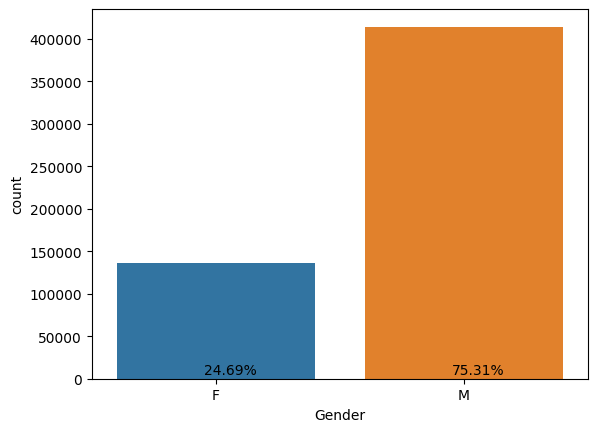

In [20]:
count_plot(data = df, x_col = 'Gender')

Observations:
1. The number of Male customers(75.31%) is larger than the number of Female customers(24.69%) in the given dataset.

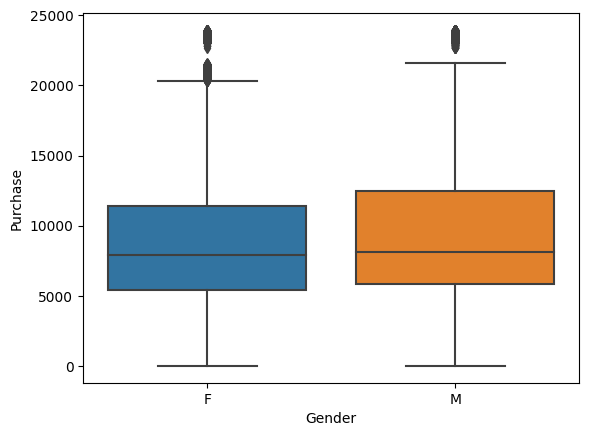

The average purchases made by Male customers is 9437.526040472265
The average purchases made by Female customers is 8734.565765155476


In [21]:
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')
plt.show()
print(f"The average purchases made by Male customers is {df.loc[df['Gender']=='M','Purchase'].mean()}")
print(f"The average purchases made by Female customers is {df.loc[df['Gender']=='F','Purchase'].mean()}")

Observations:
1. The boxplot shows that there are outliers in the purchase amounts of both Male and Female samples.
2. The median purchase amounts between male and female customers are not too different in the given sample.
2. The average and median purchases between the Male and Female customers in the given sample suggests that the average and median purchase amounts of the Male customers are slightly greater than the average and median purchase amounts of Female customers.

###### Age

In [22]:
unique_values(df,'Age')

There are 7 unique attributes in Age features.
The unique categories within the Age feature are:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Observations:
1. The Age feature is showing customers in age buckets.
2. There are 7 age buckets ranging from 0 to 55+ years.
3. Most of the customers are from the age groups 26 to 35 years followed by 36 to 45 years and 18 to 25 years.
4. Minor customers(17 or less years) have performed the least number of transactions in the dataset.

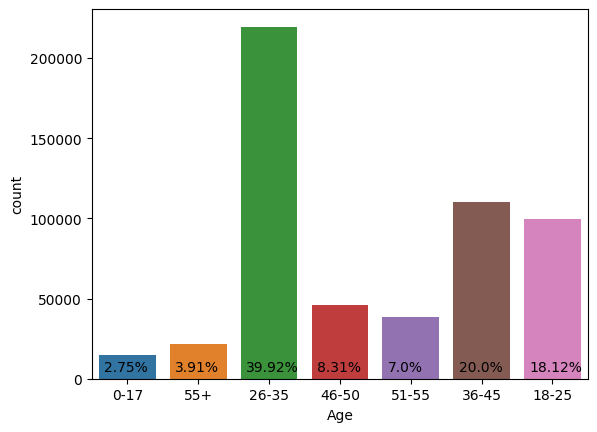

In [23]:
count_plot(data = df, x_col = 'Age', text_x_pos = -0.325)

Observations:
1. Most of the customers(39.92%) are in the age range 26-35 years followed by customers in their 36-45 years(20%) and customers in their 18-25 years(18.12%).
2. The least number of customers are in the age group 0-17(2.75%) and customers in the age group 55+(3.91%).

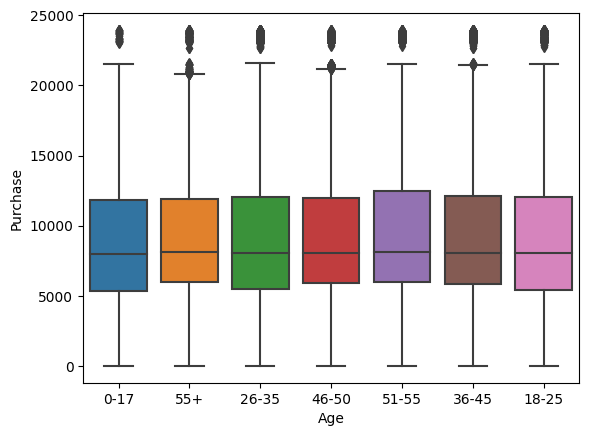

The average purchases made by customers in age group 0-17 is 8933.464640444974
The average purchases made by customers in age group 18-25 is 9169.663606261289
The average purchases made by customers in age group 26-35 is 9252.690632869888
The average purchases made by customers in age group 36-45 is 9331.350694917874
The average purchases made by customers in age group 46-50 is 9208.625697468327
The average purchases made by customers in age group 51-55 is 9534.808030960236
The average purchases made by customers in age group 55+ is 9336.280459449405


In [24]:
sns.boxplot(data = df, x = 'Age', y = 'Purchase')
plt.show()
print(f"The average purchases made by customers in age group 0-17 is {df.loc[df['Age']=='0-17','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 18-25 is {df.loc[df['Age']=='18-25','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 26-35 is {df.loc[df['Age']=='26-35','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 36-45 is {df.loc[df['Age']=='36-45','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 46-50 is {df.loc[df['Age']=='46-50','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 51-55 is {df.loc[df['Age']=='51-55','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 55+ is {df.loc[df['Age']=='55+','Purchase'].mean()}")

Observations:
1. There are outliers in the purchase amuonts in all the age groups.
2. The median purchase amounts between all the age groups seem to be almost similar.

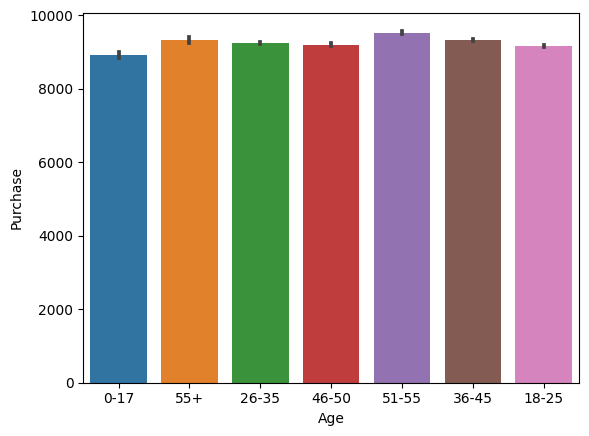

The average purchases made by customers in age group 0-17 is 8933.464640444974
The average purchases made by customers in age group 18-25 is 9169.663606261289
The average purchases made by customers in age group 26-35 is 9252.690632869888
The average purchases made by customers in age group 36-45 is 9331.350694917874
The average purchases made by customers in age group 46-50 is 9208.625697468327
The average purchases made by customers in age group 51-55 is 9534.808030960236
The average purchases made by customers in age group 55+ is 9336.280459449405


In [25]:
sns.barplot(data = df, x = 'Age', y = 'Purchase')
plt.show()
print(f"The average purchases made by customers in age group 0-17 is {df.loc[df['Age']=='0-17','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 18-25 is {df.loc[df['Age']=='18-25','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 26-35 is {df.loc[df['Age']=='26-35','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 36-45 is {df.loc[df['Age']=='36-45','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 46-50 is {df.loc[df['Age']=='46-50','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 51-55 is {df.loc[df['Age']=='51-55','Purchase'].mean()}")
print(f"The average purchases made by customers in age group 55+ is {df.loc[df['Age']=='55+','Purchase'].mean()}")

Observations:
1. The average purchase amounts between the age groups seems slightly different from one another yet pretty close.

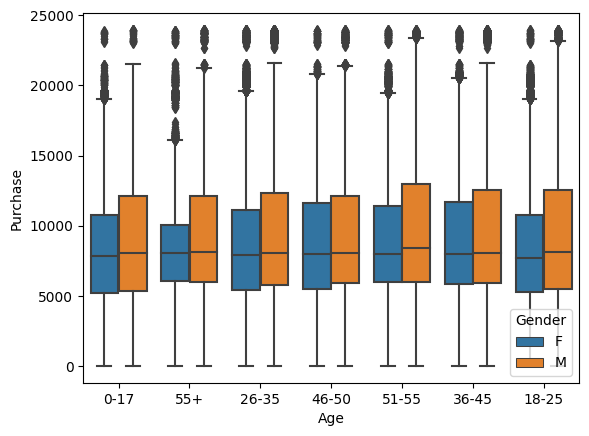

In [26]:
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')
plt.show()

Observations:
1. The Female customers have more purchase amount outliers in almost all the age groups than the Male customers.
2. The median purchase amounts of Male customers in certains age groups like 0-17, 26-35, 51-55 and 18-25 seem to be slightly greater than the median purchase amounts of the Female customers.
3. The variance in the purchase amounts of Male customers in all the age groups are greater than the variance in the purchase amounts of Female customers.

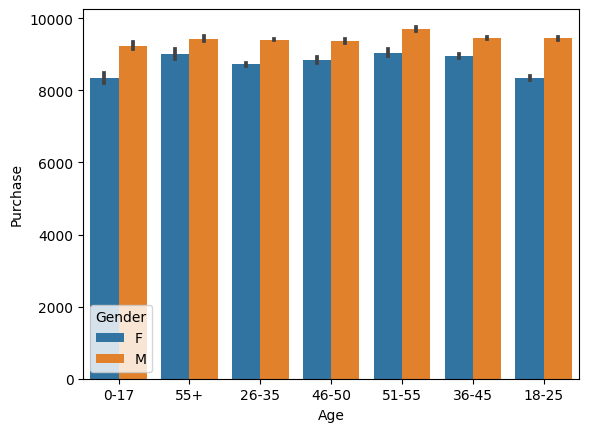

In [27]:
sns.barplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')
plt.show()

Observations:
1. Every age group suggests that the Female Purchase amount is lesser than the Male purchase amount.

###### Occupation

In [28]:
unique_values(df,'Occupation')

There are 21 unique attributes in Occupation features.
The unique categories within the Occupation feature are:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Observations:
1. There are 21 unique attributes in Occupation features. They are: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 and 20.

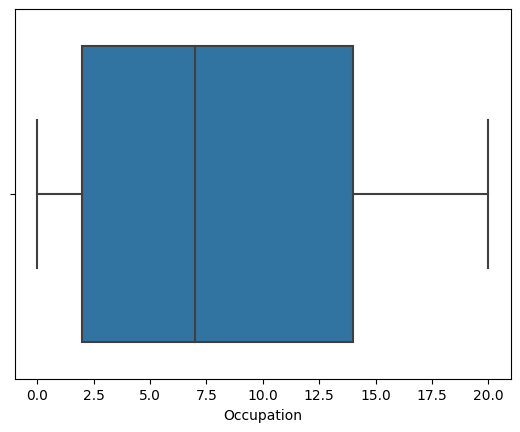

The min value in Occupation feature is 0
The max value in Occupation feature is 20
The IQR is 12.0
The middle 50 percent of data points are lying between 2.0 and 14.0
The lower bound for Occupation feature is -16.0
The upper bound for Occupation feature is 32.0
There are about 0.0 % of outliers lesser than the lower bound value -16.0 in the Occupation feature.
There are about 0.0 % of outliers greater than the upper bound value 32.0 in the Occupation feature.
The overall percentage of outliers in the Occupation feature is 0.0 %.


In [29]:
check_outliers(df, 'Occupation')

Observations:
1. There are no outliers in the Occupation variable.

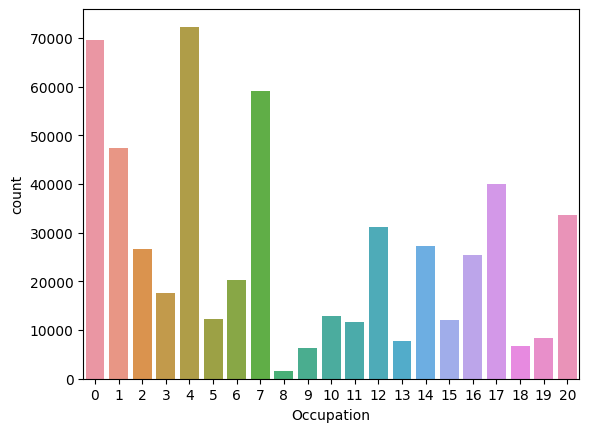

In [30]:
count_plot(data = df, x_col = 'Occupation', values = False)

Observations:
1. There are 21 Occupations that are recorded in the dataset.
2. The top 5 occupations are 4, 0, 7, 1 and 17

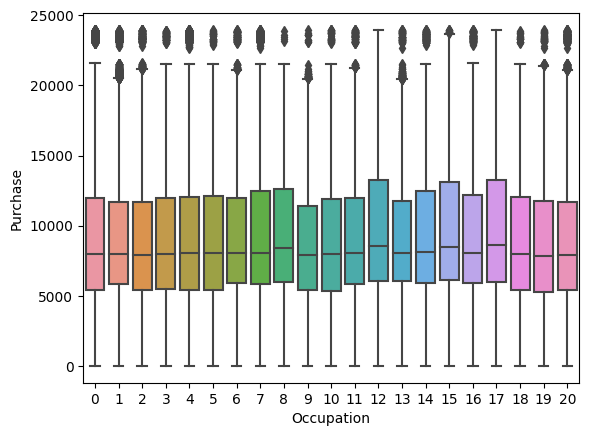

In [31]:
sns.boxplot(data = df, x = 'Occupation', y = 'Purchase')
plt.show()

Observations:
1. There are outliers in all the occupation groups with respect to Purchase amounts.
2. The box plot suggests that some median Purchases like for occupations 8,12,15 and 17 are slightly greater than the other groups.

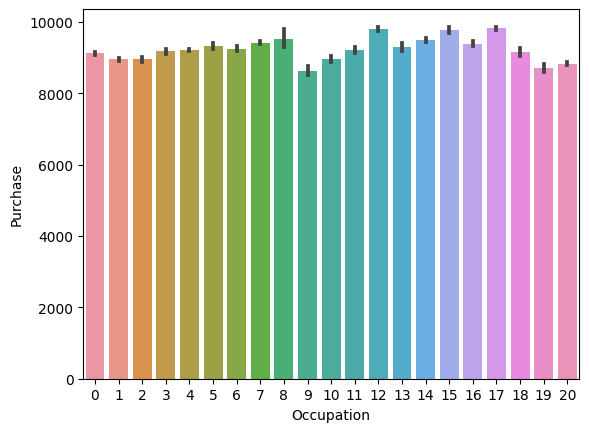

The average purchases made by customers in Occupation 0 is 9124.428587839973
The average purchases made by customers in Occupation 1 is 8953.193269514612
The average purchases made by customers in Occupation 2 is 8952.481683466225
The average purchases made by customers in Occupation 3 is 9178.593087818697
The average purchases made by customers in Occupation 4 is 9213.980251147868
The average purchases made by customers in Occupation 5 is 9333.149297856615
The average purchases made by customers in Occupation 6 is 9256.535691476296
The average purchases made by customers in Occupation 7 is 9425.728222819745
The average purchases made by customers in Occupation 8 is 9532.592496765847
The average purchases made by customers in Occupation 9 is 8637.74376092831
The average purchases made by customers in Occupation 10 is 8959.355375096675
The average purchases made by customers in Occupation 11 is 9213.84584843777
The average purchases made by customers in Occupation 12 is 9796.64023862214

In [32]:
sns.barplot(data = df, x = 'Occupation', y = 'Purchase')
plt.show()
for i in range(21):
    print(f"The average purchases made by customers in Occupation {i} is {df.loc[df['Occupation']== i,'Purchase'].mean()}")

Observations:
1. The average Purchases amounts of these occupation groups(8,12,15 amd 17) also seem to be slightly greater than the other groups.

###### City_Category

In [33]:
unique_values(df,'City_Category')

There are 3 unique attributes in City_Category features.
The unique categories within the City_Category feature are:
['A' 'C' 'B']
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Observations:
1. There are three categories in the 'City_Category' variable. They are A, B and C.
2. Most of the transactions are performed by customers in City_Category B followed by C and A.

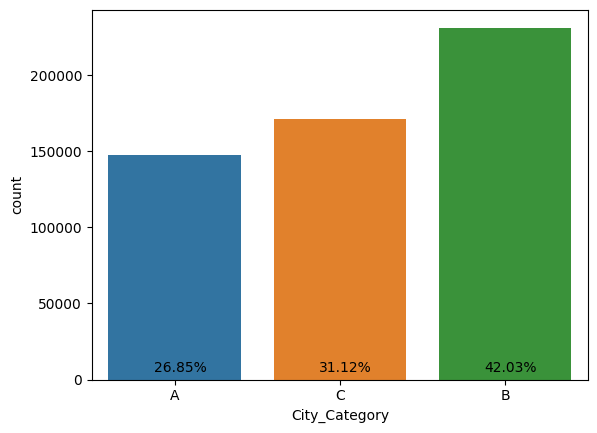

In [34]:
count_plot(data = df, x_col = 'City_Category', text_x_pos = -0.125)

Observations:
1. The highest number of customers are from the city category B(42.03%) followed by C(31.12%) and A(26.85%).

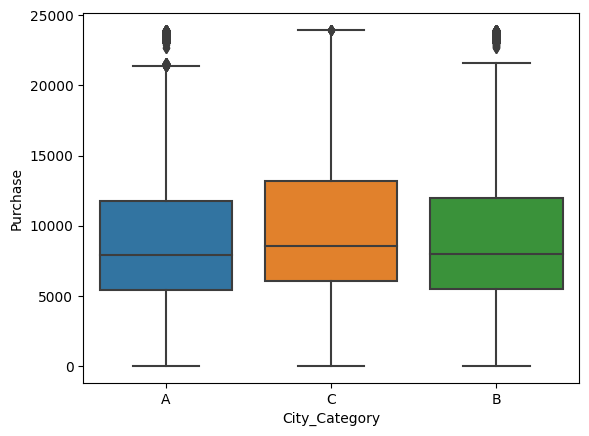

In [35]:
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase')
plt.show()

Observations:
1. The median Purchase amount and the average purchase amount of the City_Category 'C' seem to be slightly greater than the median Purchase amount of City_Category 'A' and 'B'.

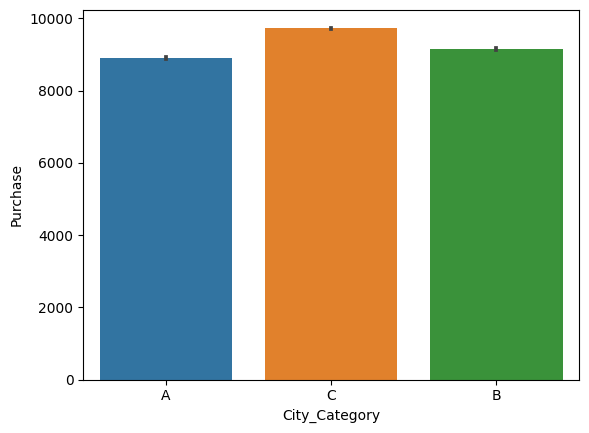

The average purchases made by customers in City_Category A is 8911.939216084484
The average purchases made by customers in City_Category C is 9719.92099313568
The average purchases made by customers in City_Category B is 9151.300562781986


In [36]:
sns.barplot(data=df, x = 'City_Category', y = 'Purchase')
plt.show()

for i in df['City_Category'].unique():
    print(f"The average purchases made by customers in City_Category {i} is {df.loc[df['City_Category']== i,'Purchase'].mean()}")

Observations:
1. The average Purchase amount of the City_Category 'C' seem to be slightly greater than the average Purchase amount of City_Category 'A' and 'B'.

###### Stay_In_Current_City_Years

In [37]:
unique_values(df,'Stay_In_Current_City_Years')

There are 5 unique attributes in Stay_In_Current_City_Years features.
The unique categories within the Stay_In_Current_City_Years feature are:
['2' '4+' '3' '1' '0']
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


Observations:
1. There are 5 categories in the Stay_In_Current_City_Years variable. The categories are 0, 1, 2, 3 and 4+.
2. Most of the customers are in staying in their current cities for 1 year followed by 2,3 and 4+ years.
3. The least number of customers have said that they are in their current cities for less than 1 year.

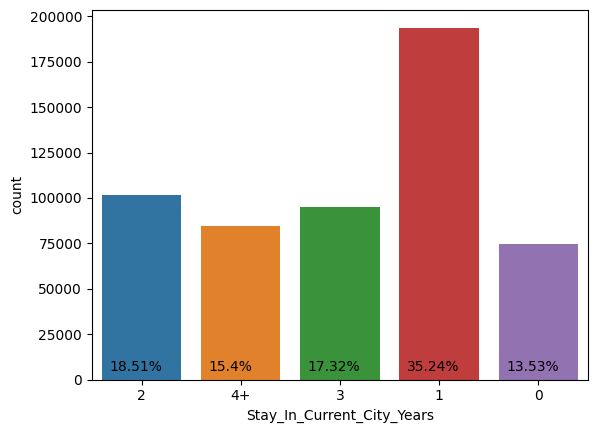

In [38]:
count_plot(data = df, x_col = 'Stay_In_Current_City_Years', text_x_pos = -0.325)

Observations:
1. About 35.24 % of the customers have stated that they are staying in the current city for atleast 1 year.
2. About 18.51%, 17.32%, 15.4% and 13.53% of the customers in the dataset have said that they are staying in the current city for 2, 3, 4+ and 0 years respectively.

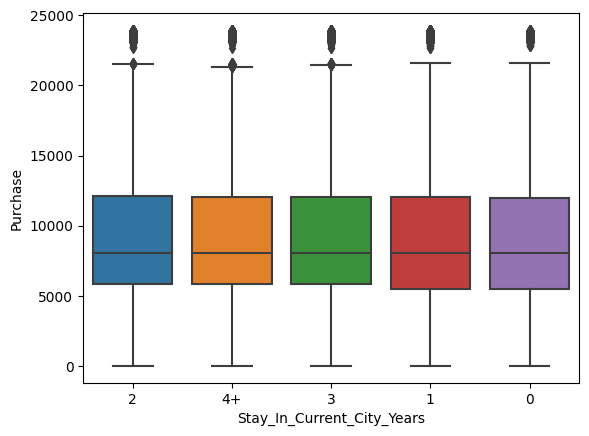

In [39]:
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase')
plt.show()

Observations:
1. There are some outliers in all the Stay_In_Current_City_Years variable.
2. The median Purchase amounts of all the groups seem to be pretty close to each other.

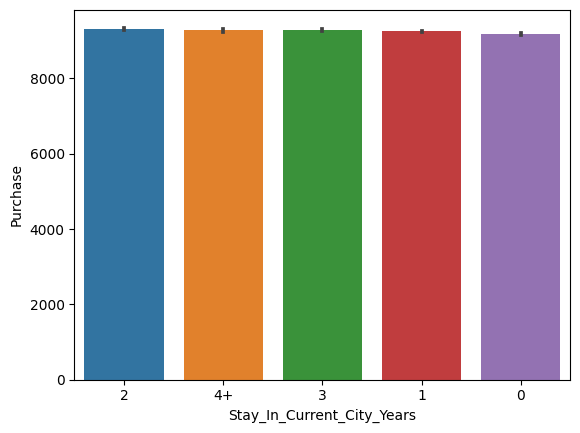

The average purchases made by customers in Stay_In_Current_City_Years 2 is 9320.429810090536
The average purchases made by customers in Stay_In_Current_City_Years 4+ is 9275.59887165687
The average purchases made by customers in Stay_In_Current_City_Years 3 is 9286.904119221284
The average purchases made by customers in Stay_In_Current_City_Years 1 is 9250.145923300364
The average purchases made by customers in Stay_In_Current_City_Years 0 is 9180.075122987177


In [40]:
sns.barplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase')
plt.show()

for i in df['Stay_In_Current_City_Years'].unique():
    print(f"The average purchases made by customers in Stay_In_Current_City_Years {i} is {df.loc[df['Stay_In_Current_City_Years']== i,'Purchase'].mean()}")

Observations:
1. The bar plot suggests that the average Purchase amounts of all the categories in Stay_In_Current_City_Years are pretty close to each other.

###### Marital_Status

In [41]:
unique_values(df,'Marital_Status')

There are 2 unique attributes in Marital_Status features.
The unique categories within the Marital_Status feature are:
[0 1]
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Observations:
1. There are two categories in the Marital_Status variable. They are 0 and 1 where 0 represents Single customers and 1 represents Married customers.
2. There are more Single customers than Married customers.

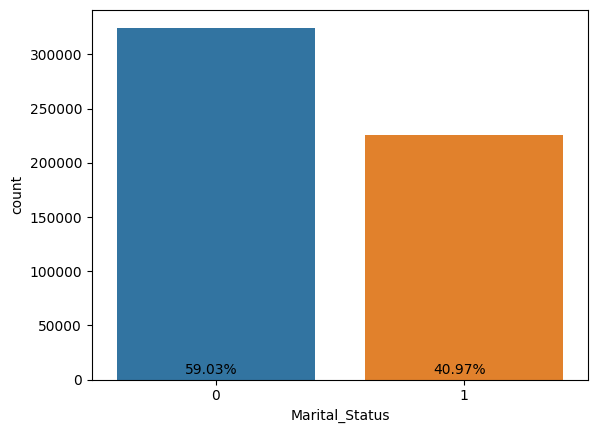

In [42]:
count_plot(data = df, x_col = 'Marital_Status', text_x_pos = -0.125)

Observations:
1. There are 59.03% of customers with Marital_Status = 0 and 40.97% of the customers with Marital_Status = 1.

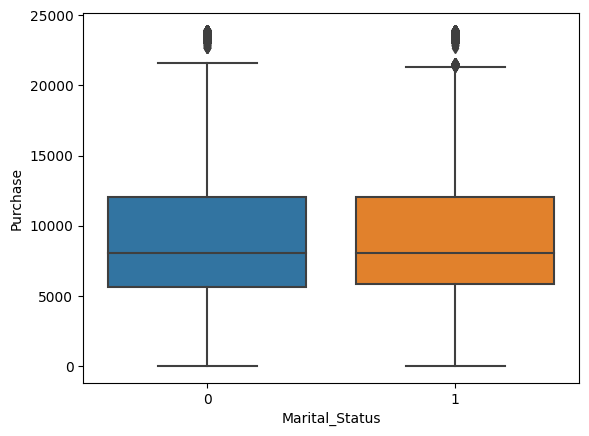

In [43]:
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase')
plt.show()

Observations:
1. There are outliers in both Marital_Status categories.
2. The median purchase amounts seem to be very similar for both the groups.

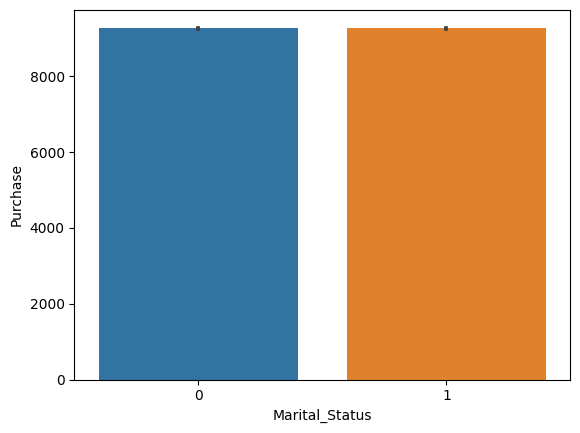

The average purchases made by customers in Marital_Status 0 is 9265.907618921507
The average purchases made by customers in Marital_Status 1 is 9261.174574082374


In [44]:
sns.barplot(data = df, x = 'Marital_Status', y = 'Purchase')
plt.show()

for i in df['Marital_Status'].unique():
    print(f"The average purchases made by customers in Marital_Status {i} is {df.loc[df['Marital_Status']== i,'Purchase'].mean()}")

Observations:
1. The barplot shows that the average purchase amounts of both Single and Married customers are quite similar.

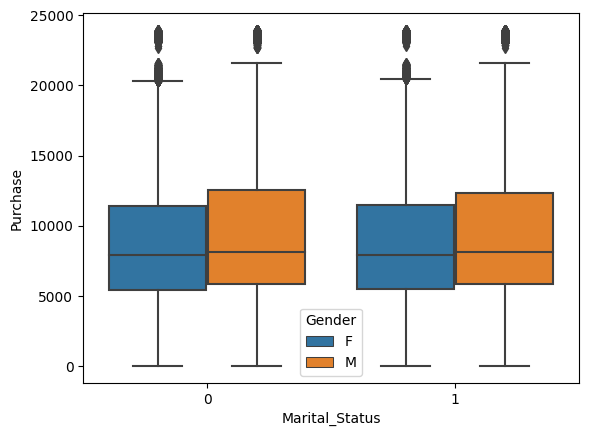

In [45]:
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender')
plt.show()

Observations:
1. The Female customers have more outliers than Male customers in terms of Purchase amounts.
2. The Median purchase amounts of the Male customers seem to be slightly greater than the medium purchase amounts of the Female customers.

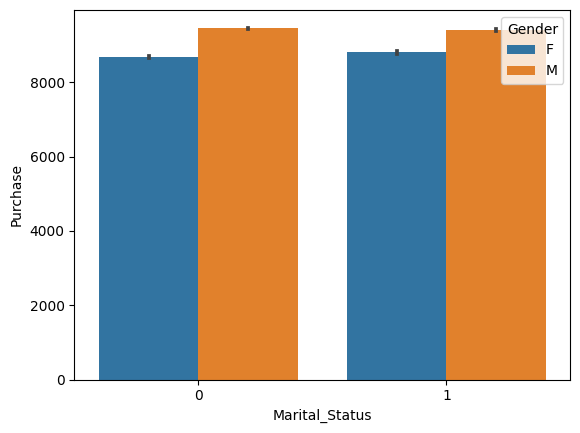

In [46]:
sns.barplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender')
plt.show()

Observations:
1. Although the Median purchase amounts of the Male and Female customers in both the Marital Status groups are similar, the barplot suggests that, the average purchase amounts of the Male customers are slightly greater than the average purchase amounts of the Female customers.

###### Product_Category

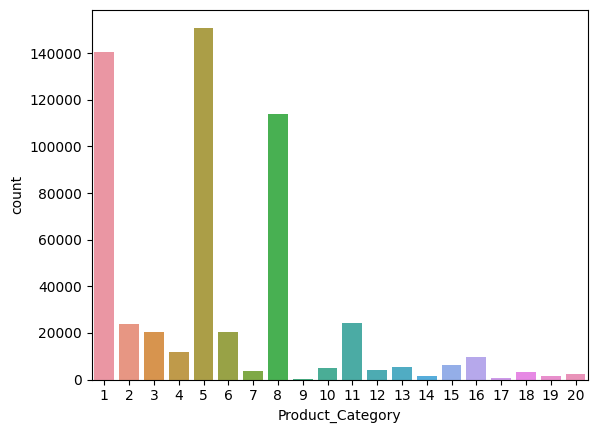

There are 20 unique attributes in Product_Category features.
The unique categories within the Product_Category feature are:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64


In [47]:
count_plot(data = df, x_col = 'Product_Category', values =False)
unique_values(df,'Product_Category')

Observations:
1. There are 20 unique attributes in Product_Category features. They are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 and 20.
2. The top 5 most number of records in the dataset are for Product Categories 5, 1, 8, 11 and 2.

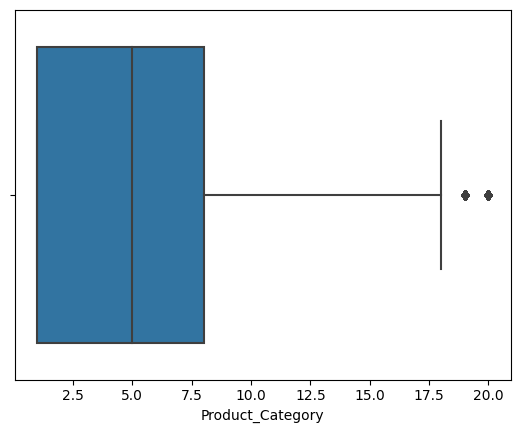

The min value in Product_Category feature is 1
The max value in Product_Category feature is 20
The IQR is 7.0
The middle 50 percent of data points are lying between 1.0 and 8.0
The lower bound for Product_Category feature is -9.5
The upper bound for Product_Category feature is 18.5
There are about 0.0 % of outliers lesser than the lower bound value -9.5 in the Product_Category feature.
There are about 0.75 % of outliers greater than the upper bound value 18.5 in the Product_Category feature.
The overall percentage of outliers in the Product_Category feature is 0.75 %.


In [48]:
check_outliers(df,'Product_Category')

Observations:
1. There are some outliers(0.75%) in the Product_Category variable.

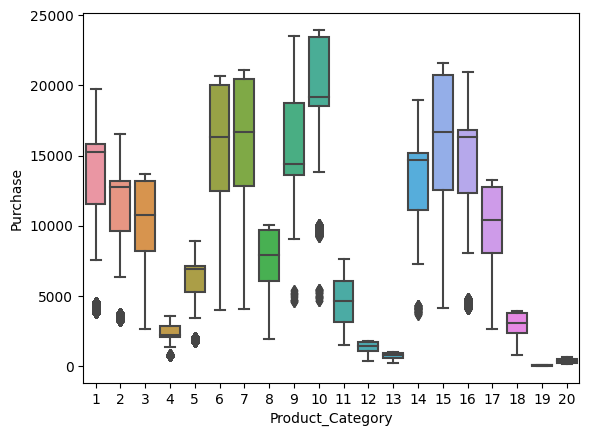

In [49]:
sns.boxplot(data = df, x = 'Product_Category', y = 'Purchase')
plt.show()

Observations:
1. There are some outliers in few of the product categories like 1, 2, 4, 5, 9, 10, 14 and 16.
2. The product category 10 has the highest median purchase amount of all the product categories followed by 7, 15, 6 and 16.
3. The least median purchase amounts are for 19, 20, 13 and 12.


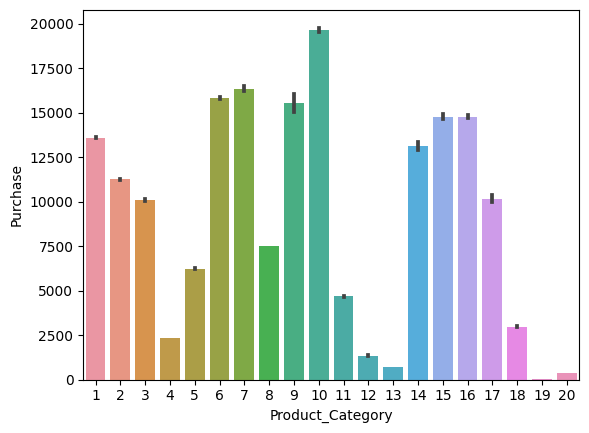

The average purchases made by customers in Product_Category 3 is 10096.705733933608
The average purchases made by customers in Product_Category 1 is 13606.218595506418
The average purchases made by customers in Product_Category 12 is 1350.8598935900684
The average purchases made by customers in Product_Category 8 is 7498.958077682686
The average purchases made by customers in Product_Category 5 is 6240.088178198273
The average purchases made by customers in Product_Category 4 is 2329.6594911937377
The average purchases made by customers in Product_Category 2 is 11251.93538384177
The average purchases made by customers in Product_Category 6 is 15838.478549789896
The average purchases made by customers in Product_Category 14 is 13141.62573867367
The average purchases made by customers in Product_Category 11 is 4685.268456375839
The average purchases made by customers in Product_Category 13 is 722.4006127230132
The average purchases made by customers in Product_Category 15 is 14780.451828

In [50]:
sns.barplot(data = df, x = 'Product_Category', y = 'Purchase')
plt.show()

for i in df['Product_Category'].unique():
    print(f"The average purchases made by customers in Product_Category {i} is {df.loc[df['Product_Category']== i,'Purchase'].mean()}")

Observations:
1. The product category 10 has the highest average purchase amount of all the product categories followed by 7, 6, 9, 15 and 16.
2. The least average purchase amounts are for 19, 20, 13 and 12.

###### Purchase

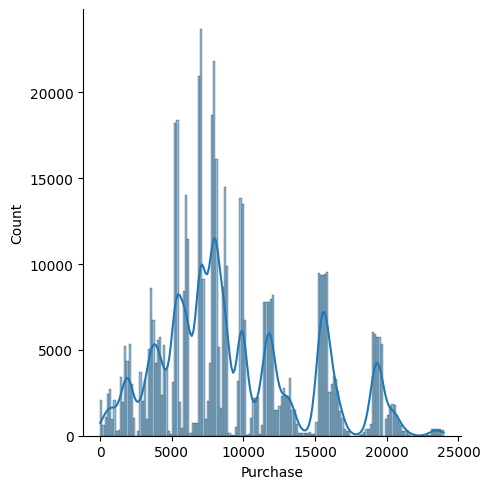

In [58]:
sns.displot(df['Purchase'], kde =  True)
plt.show()

Observations:
1. The Purchase variable is not a Gaussian distribution for the dataset provided.

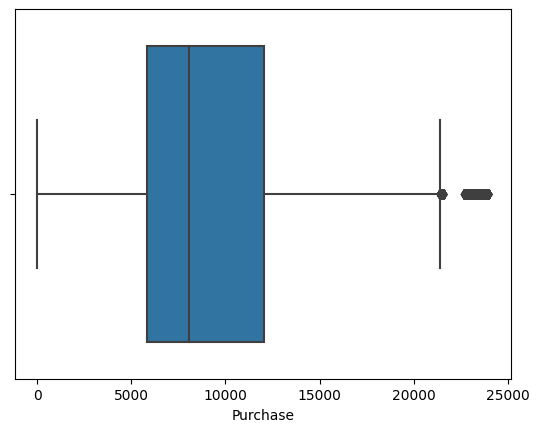

The min value in Purchase feature is 12
The max value in Purchase feature is 23961
The IQR is 6231.0
The middle 50 percent of data points are lying between 5823.0 and 12054.0
The lower bound for Purchase feature is -3523.5
The upper bound for Purchase feature is 21400.5
There are about 0.0 % of outliers lesser than the lower bound value -3523.5 in the Purchase feature.
There are about 0.49 % of outliers greater than the upper bound value 21400.5 in the Purchase feature.
The overall percentage of outliers in the Purchase feature is 0.49 %.


In [54]:
check_outliers(df, 'Purchase')

Observations:
1. There are few outliers(0.49%) in the Purchase variable.

### Correlation

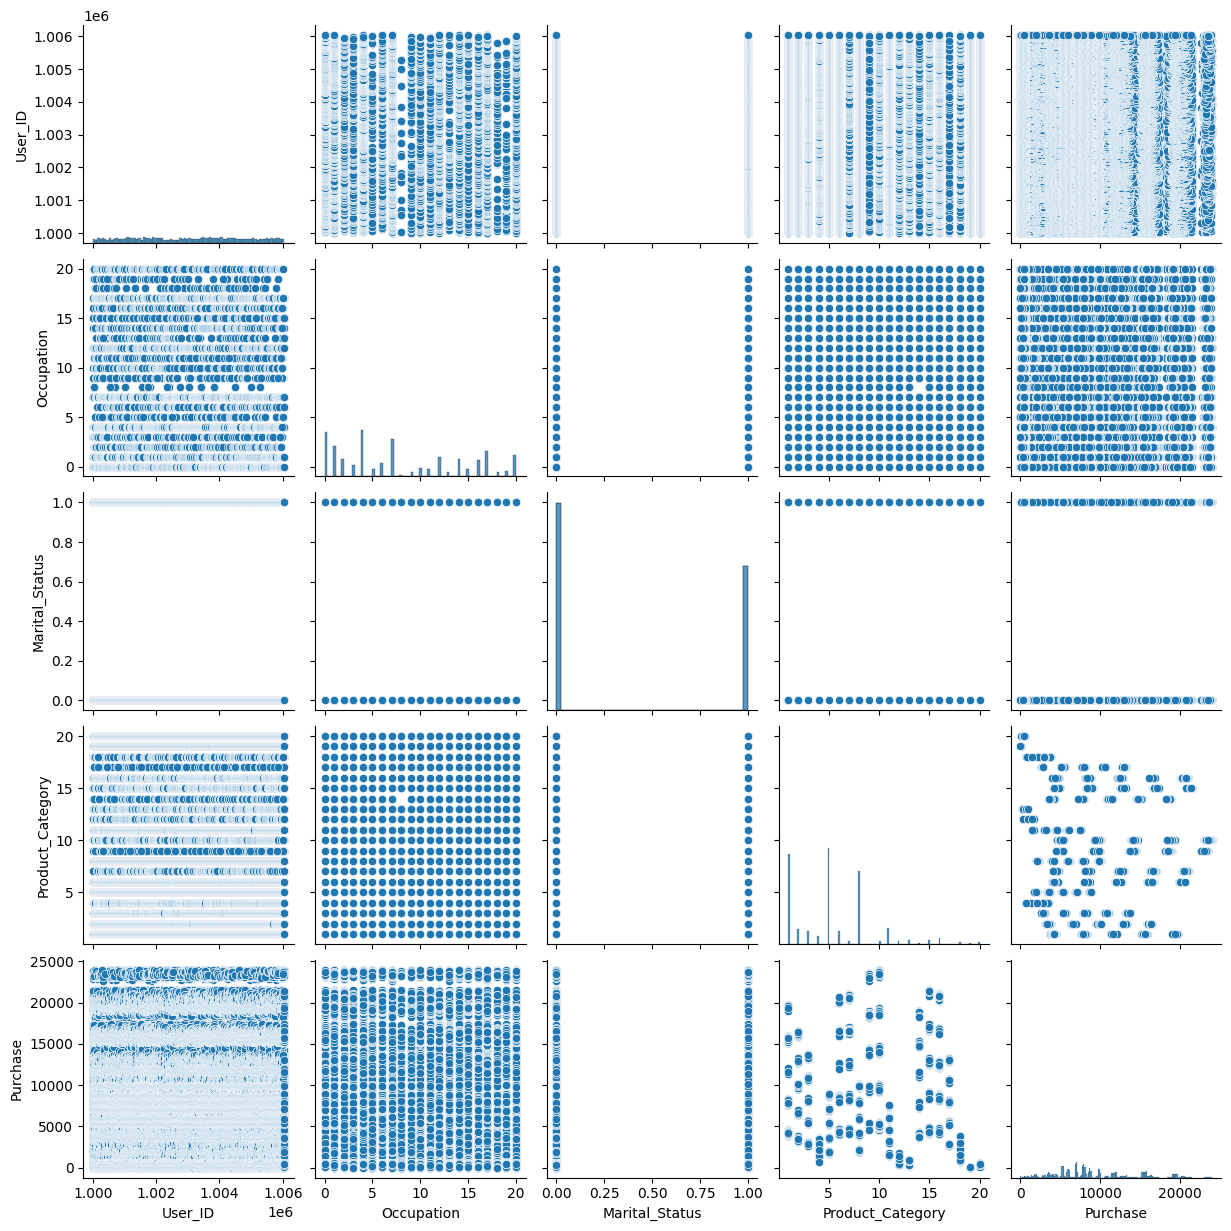

In [59]:
sns.pairplot(df)
plt.show()

Observations:
1. The pair plot doesn't show much correlations between the variables.
2. The plot between Product_Category and Purchase shows some correlation. It shows that some in product categories the purchase amount is more and in some the purchase amount is less.

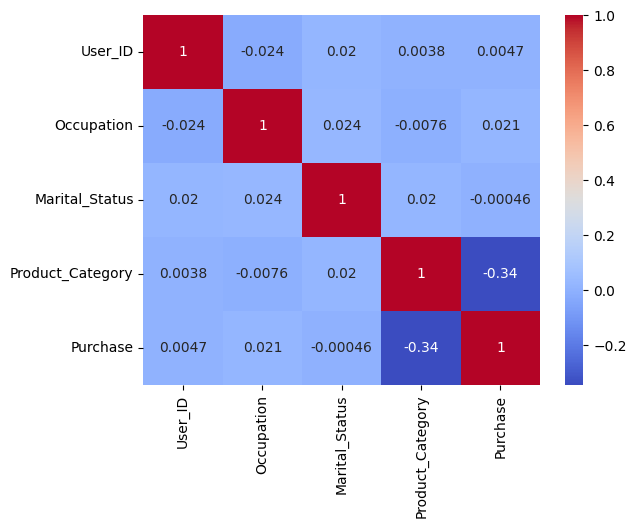

In [60]:
sns.heatmap(df[['User_ID','Occupation','Marital_Status','Product_Category','Purchase']].corr(), cmap = 'coolwarm', annot = True)
plt.show()

Observations:
1. The heatmap also shows that there is no strong correlation between the variables.

## Population Inferences

In [61]:
df.shape

(550068, 10)

###### Q1. Are women spending more money per transaction than men? Why or Why not? (10 Points)

In [62]:
df.loc[df['Gender'] == 'M'].Purchase.mean()

9437.526040472265

In [63]:
df.loc[df['Gender'] == 'F'].Purchase.mean()

8734.565765155476

Observations:
1. We can see that the average purchase made by Male customers is 9437.52 and the average purchase made by Female customers is 8734.56.
2. The given dataset is only a sample(55k datapoints) of the entire population(100M datapoints). So we cannot infer for the population data from just one sample that the average purchases of Male is greater than the average purchases of Female customers.

In [71]:
df.loc[df['Gender'] == 'M'].Purchase.shape, df.loc[df['Gender'] == 'F'].Purchase.shape

((414259,), (135809,))

Observations:
1. In the given sample dataset, the number of Male customers are 41.42k and the number of Female customers are only 13.58k.
2. It is given as assumption that 50 million customers are male and 50 million are female in the population.

### Central Limit Theorem

The central limit theorem states that if we have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

#### Bootstrap sampling

In [3]:
def get_confidence_interval_from_sample_means(data, col, ci = 0.99, iterations = 1000, sample_size = 'full'):
    """
    This function calculations the confidence interval of means 
    by creating a distribution of sample means of size 'iterations' 
    from bootstraped samples of size 'sample_size' each from the given sample data 'data'.
    """
    
    mean_distribution  = []
    #bootstrapping

    # Draw a bootstrap sample of size n
    for value in data[col].unique():
        ds = data[data[col] == value]
        if sample_size == 'each':
            n = len(ds)
        elif sample_size == 'full':
            n = len(data)
        else:
            n = sample_size
        
        for i in range(iterations):

            bootstrap_sample = ds.sample(n=n, replace=True)
            sample_mean = bootstrap_sample['Purchase'].mean()
            mean_distribution.append(sample_mean)
        sample_dist_mean = np.mean(mean_distribution)
        sample_dist_std = np.std(mean_distribution)
        
        print(f"Sample mean distribution size of {iterations} means.")
        print(f"Bootstrap sample of {n} datapoints for customers with {col} = {value} from the given sample dataset.")
        print(f"Average Purchase amount of the population for customers with {col} = {value} with {int(ci*100)} % confidence will be in the interval:\n {norm.interval(ci,loc=sample_dist_mean,scale=(sample_dist_std/np.sqrt(iterations)))}\n")


In [4]:
def get_confidence_interval(data, col, ci = 0.99, sample_size = 'full'):
    """
    This function calculations the confidence interval of means 
    by creating bootstrapped samples of size  'sample_size' from the
    given sample data 'data'.
    """
    
    #bootstrapping

    # Draw a bootstrap sample of size n
    for value in data[col].unique():
        ds = data[data[col] == value]
        if sample_size == 'each':
            n = len(ds)
        elif sample_size == 'full':
            n = len(data)
        else:
            n = sample_size

        bootstrap_sample = ds.sample(n=n, replace=True)

        sample_mean = bootstrap_sample['Purchase'].mean()

        sample_std = bootstrap_sample['Purchase'].std()
        
        print(f"Bootstrap sample of {n} datapoints for customers with {col} = {value} from the given sample dataset.")
        print(f"Average Purchase amount of the population for customers with {col} = {value} with {int(ci*100)} % confidence will be in the interval:\n {norm.interval(ci,loc=sample_mean,scale=(sample_std/np.sqrt(n)))}\n")


###### Analyzing the Gender variable against Purchase amounts

In [8]:
n = len(df)

male_mean_distribution = []
female_mean_distribution = []

m_df = df[df['Gender'] == 'M']
f_df = df[df['Gender'] == 'F']

n = 100000

male_n = 50000
female_n = 50000

for i in range(n):
    m_bootstrap_sample = m_df.sample(n=male_n, replace=True)
    f_bootstrap_sample = f_df.sample(n=female_n, replace=True)
    sample_female_mean = f_bootstrap_sample['Purchase'].mean()
    sample_male_mean = m_bootstrap_sample['Purchase'].mean()
    male_mean_distribution.append(sample_male_mean)
    female_mean_distribution.append(sample_female_mean)

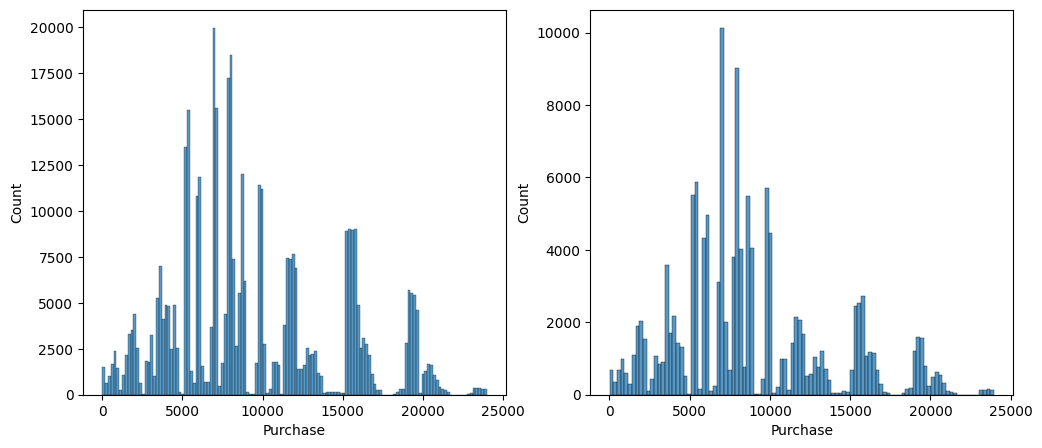

The average Purchase amount of Male customers is 9437.6598380034 from a distribution of bootstrapped sample means.


In [10]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(m_df['Purchase'])

plt.subplot(1,2,2)
sns.histplot(f_df['Purchase'])
plt.show()
print(f"The average Purchase amount of Male customers is {np.mean(male_mean_distribution)} from a distribution of bootstrapped sample means.")

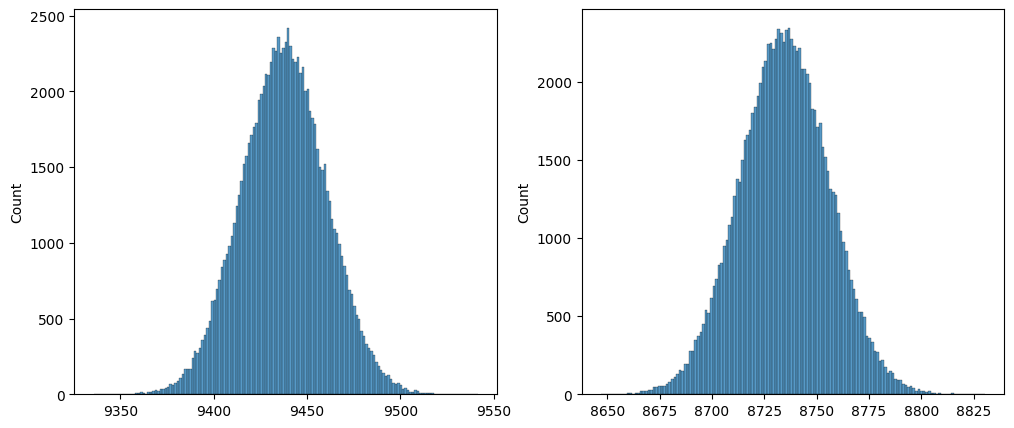

The average Purchase amount of Female customers is 8734.6035728612 from a distribution of bootstrapped sample means.


In [11]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(male_mean_distribution)

plt.subplot(1,2,2)
sns.histplot(female_mean_distribution)
plt.show()
print(f"The average Purchase amount of Female customers is {np.mean(female_mean_distribution)} from a distribution of bootstrapped sample means.")

Observations:
1. The bootstrapped sample mean distribution shows an almost Gaussian distribution with 100000 sample means.

###### Ans for Q1: 

As per the given dataset, after generating a distribution of sample means of bootstraped samples, average purchase amount for women customers is 8734.603 and the average purchase amount of Men customer is 9437.659, we can say that women are not spending more money per transaction than men. 

We can also look for the confidence intervals below.

###### Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

##### Confidence interval of average Purchase amounts of Male and Female customers. 

###### Getting the confidence interval of average Purchase amounts by Bootstraping samples from given dataset

In [10]:
get_confidence_interval(data = df, col = "Gender", ci = 0.99, sample_size = 800)

Bootstrap sample of 800 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 99 % confidence will be in the interval:
 (8409.757428690196, 9309.255071309804)

Bootstrap sample of 800 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 99 % confidence will be in the interval:
 (9021.367328360666, 9951.385171639333)



In [11]:
get_confidence_interval(data = df, col = "Gender", ci = 0.95, sample_size = 800)

Bootstrap sample of 800 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 95 % confidence will be in the interval:
 (8436.320736531301, 9124.096763468699)

Bootstrap sample of 800 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 95 % confidence will be in the interval:
 (9156.991728239207, 9875.143271760791)



In [12]:
get_confidence_interval(data = df, col = "Gender", ci = 0.90, sample_size = 800)

Bootstrap sample of 800 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 90 % confidence will be in the interval:
 (8506.962821678748, 9049.017178321252)

Bootstrap sample of 800 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 90 % confidence will be in the interval:
 (9139.83265018633, 9735.587349813668)



Observations:

1. Incase of bootstrapped sample size of 800 datapoints from the given dataset :

        1.With 99 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8409.757, 9309.255]

            b. Gender = M , Mean purchase amount will be in the interval [9021.367, 9951.385]

        2.With 95 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8436.321, 9124.097]

            b. Gender = M , Mean purchase amount will be in the interval [9156.992, 9875.143]

        3.With 90 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8506.963, 9049.017]

            b. Gender = M , Mean purchase amount will be in the interval [9139.833, 9735.587]

###### Getting the confidence interval of average Purchase amounts from a distribution of sample means of Bootstraped samples from given dataset

In [15]:
get_confidence_interval_from_sample_means(data = df, col = "Gender", ci = 0.99, iterations = 50, sample_size = 50)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 99 % confidence will be in the interval:
 (8354.456090811771, 8825.196709188225)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 99 % confidence will be in the interval:
 (8693.638467556304, 9279.860732443694)



In [16]:
get_confidence_interval_from_sample_means(data = df, col = "Gender", ci = 0.95, iterations = 50, sample_size = 50)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 95 % confidence will be in the interval:
 (8469.148727645614, 8838.723272354386)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 95 % confidence will be in the interval:
 (8872.71610129412, 9297.24229870588)



In [17]:
get_confidence_interval_from_sample_means(data = df, col = "Gender", ci = 0.9, iterations = 50, sample_size = 50)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 90 % confidence will be in the interval:
 (8537.734906341704, 8876.885893658293)

Sample mean distribution size of 50 means.
Bootstrap sample of 50 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 90 % confidence will be in the interval:
 (8875.843534348885, 9232.518465651114)



Observations:
1. Incase of sample mean distribution of 50 datapoints with sample size of 50 datapoints:

        1.With 99 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8354.456, 8825.197]

            b. Gender = M , Mean purchase amount will be in the interval [8693.638, 9279.861]

        2.With 95 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8469.149, 8838.723]

            b. Gender = M , Mean purchase amount will be in the interval [8872.716, 9297.242]

        3.With 90 % confidence:

            a. Gender = F , Mean purchase amount will be in the interval [8537.735, 8876.886]

            b. Gender = M , Mean purchase amount will be in the interval [8875.844, 9232.518]

Observations:
1. We can observe that by reducing the confidence from 99% to 95% to 90%, the overlap between the two confidence intervals are decreasing. With 95% confidence, with only 50 datapoints in the bootstrapped sample, the average purchase interval for Male customers is [8872.716, 9297.242] and for female customers is [8469.149, 8838.723].
2. Here, we can observe that the male customers' average purchase amounts is greater than the female customers' average purchase amounts.

###### Lets look at the CI with a distribution of sample means

In [19]:
get_confidence_interval_from_sample_means(data = df, col = "Gender", ci = 0.99, iterations = 100000, sample_size = 50000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 50000 datapoints for customers with Gender = F from the given sample dataset.
Average Purchase amount of the population for customers with Gender = F with 99 % confidence will be in the interval:
 (8734.376089877554, 8734.722719049649)

Sample mean distribution size of 100000 means.
Bootstrap sample of 50000 datapoints for customers with Gender = M from the given sample dataset.
Average Purchase amount of the population for customers with Gender = M with 99 % confidence will be in the interval:
 (9083.127691577816, 9088.864289635787)



Observations:

Incase of sample mean distribution with 100k datapoints which are the means of bootstraped samples of 50k datapoints:

 1.With 99 % confidence:

     a. Gender = F , Mean purchase amount will be in the interval [8734.376, 8734.722]

     b. Gender = M , Mean purchase amount will be in the interval [9083.128, 9088.864]


Observations:
1. Using a distribution of sample means with 100k datapoints which are the means of bootstraped samples of 50k datapoints, we are able to get average Purchase amount intervals that are not overlapping.
2. The Mean purchase amount for the Female customers is in the interval [8734.376, 8734.722] and the Mean purchase amount for the Male customers will be in the interval [9083.128, 9088.864] with 99% confidence.
3. We can say with 99 % confidence that the average purchase amount for the Male customers is greater than the average purchase amount of the Female customers.

Since a sample mean distribution with 100k datapoints which are the means of bootstrapped samples of 50k datapoints, are giving pretty good mean intervals even with 99% confidence, I will replicate that for the Age and Marital_Status as well. 

###### Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

###### Ans: With 99% confidence, the confidence intervals are not overlapping when we get the confidence interval from a distribution of sample means of size 100k from bootstrapped samples of size 50k from the given dataset.

###### The Mean purchase amount for the Female customers is in the interval [8734.376, 8734.722] and the Mean purchase amount for the Male customers will be in the interval [9083.128, 9088.864] with 99% confidence.

###### 1. Walmart can improve their strategy to engage female customers more by providing some attractive combo offers or discounts

###### 2. Walmart can try to add more female centric products to attract more female customers.

###### Q6. Results when the same activity is performed for Age (10 Points)

##### Analyzing the Age variable.

In [100]:
for i in df.Age.unique():
    print(f"The average purchase of customers aged {i} is {df[df['Age'] == i].Purchase.mean()}")

The average purchase of customers aged 0-17 is 8933.464640444974
The average purchase of customers aged 55+ is 9336.280459449405
The average purchase of customers aged 26-35 is 9252.690632869888
The average purchase of customers aged 46-50 is 9208.625697468327
The average purchase of customers aged 51-55 is 9534.808030960236
The average purchase of customers aged 36-45 is 9331.350694917874
The average purchase of customers aged 18-25 is 9169.663606261289


Observations:
1. The average purchase amounts of customers based in their age groups from the given dataset are:
    
        0-17 is 8933.465
        55+ is 9336.28
        26-35 is 9252.691
        46-50 is 9208.626
        51-55 is 9534.808
        36-45 is 9331.351
        18-25 is 9169.664

In [86]:
df.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [87]:
n = len(df)

mean_dist_0_17 = []
mean_dist_18_25 = []
mean_dist_26_35 = []
mean_dist_36_45 = []
mean_dist_46_50 = []
mean_dist_51_55 = []
mean_dist_55p = []

df_17 = df[df['Age'] == '0-17']
df_18_25 = df[df['Age'] == '18-25']
df_26_35 = df[df['Age'] == '26-35']
df_36_45 = df[df['Age'] == '36-45']
df_46_50 = df[df['Age'] == '46-50']
df_51_55 = df[df['Age'] == '51-55']
df_55p = df[df['Age'] == '55+']


n = 100000

for i in range(n):
    bootstrap_sample_17 = df_17.sample(n=50000, replace=True)
    bootstrap_sample_25 = df_18_25.sample(n=50000, replace=True)
    bootstrap_sample_35 = df_26_35.sample(n=50000, replace=True)
    bootstrap_sample_45 = df_36_45.sample(n=50000, replace=True)
    bootstrap_sample_50 = df_46_50.sample(n=50000, replace=True)
    bootstrap_sample_55 = df_51_55.sample(n=50000, replace=True)
    bootstrap_sample_55p = df_55p.sample(n=50000, replace=True)
    
    sample_17_mean = bootstrap_sample_17['Purchase'].mean()
    sample_25_mean = bootstrap_sample_25['Purchase'].mean()
    sample_35_mean = bootstrap_sample_35['Purchase'].mean()
    sample_45_mean = bootstrap_sample_45['Purchase'].mean()
    sample_50_mean = bootstrap_sample_50['Purchase'].mean()
    sample_55_mean = bootstrap_sample_55['Purchase'].mean()
    sample_55p_mean = bootstrap_sample_55p['Purchase'].mean()
    
    
    mean_dist_0_17.append(sample_17_mean)
    mean_dist_18_25.append(sample_25_mean)
    mean_dist_26_35.append(sample_35_mean)
    mean_dist_36_45.append(sample_45_mean)
    mean_dist_46_50.append(sample_50_mean)
    mean_dist_51_55.append(sample_55_mean)
    mean_dist_55p.append(sample_55p_mean)

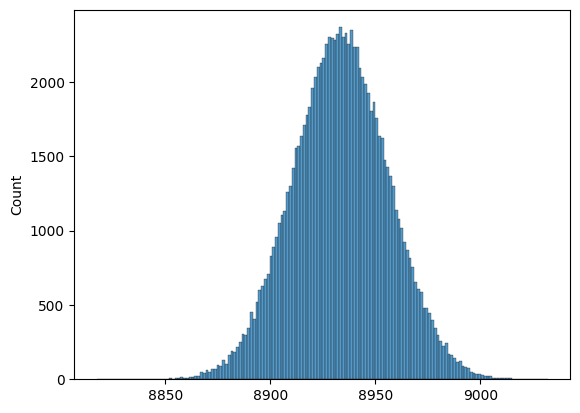

Population mean for the customers in 0-17 age group using bootstrap sampling is: 8933.439345096602
Sample mean for the customers in 0-17 age group in the given dataset is 8933.464640444974


In [88]:
sns.histplot(mean_dist_0_17)
plt.show()
print(f"Population mean for the customers in 0-17 age group using bootstrap sampling is: {np.mean(mean_dist_0_17)}")
print(f"Sample mean for the customers in 0-17 age group in the given dataset is {df_17['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 0-17 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 0-17 age group using bootstrap sampling is: 8933.439.
3. Sample mean for the customers in 0-17 age group in the given dataset is 8933.465.

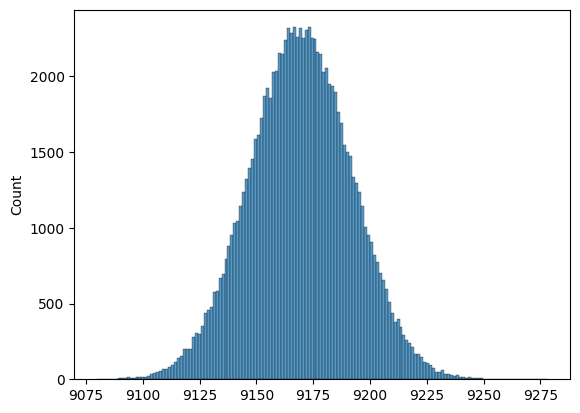

Population mean for the customers in 18-25 age group using bootstrap sampling is: 9169.552969170802
Sample mean for the customers in 18-25 age group in the given dataset is 9169.663606261289


In [89]:
sns.histplot(mean_dist_18_25)
plt.show()
print(f"Population mean for the customers in 18-25 age group using bootstrap sampling is: {np.mean(mean_dist_18_25)}")
print(f"Sample mean for the customers in 18-25 age group in the given dataset is {df_18_25['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 18-25 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 18-25 age group using bootstrap sampling is: 9169.553.
3. Sample mean for the customers in 18-25 age group in the given dataset is 9169.664.

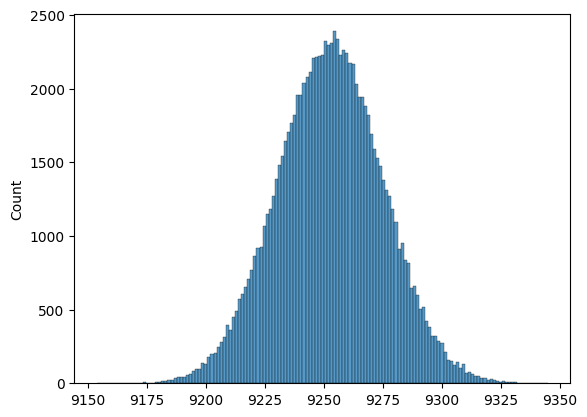

Population mean for the customers in 26_35 age group using bootstrap sampling is: 9252.746057755601
Sample mean for the customers in 26_35 age group in the given dataset is 9252.690632869888


In [90]:
sns.histplot(mean_dist_26_35)
plt.show()
print(f"Population mean for the customers in 26_35 age group using bootstrap sampling is: {np.mean(mean_dist_26_35)}")
print(f"Sample mean for the customers in 26_35 age group in the given dataset is {df_26_35['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 26-35 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 26_35 age group using bootstrap sampling is: 9252.746.
3. Sample mean for the customers in 26_35 age group in the given dataset is 9252.690.

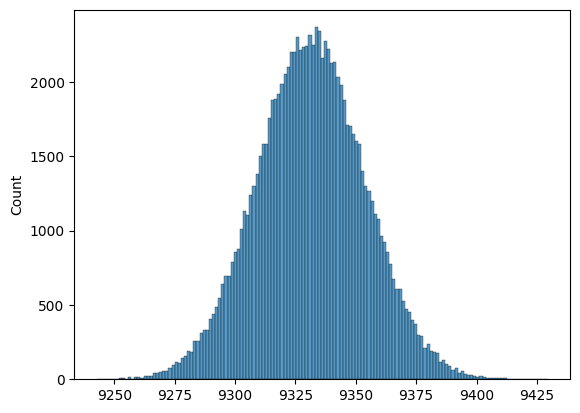

Population mean for the customers in 36_45 age group using bootstrap sampling is: 9331.395900144802
Sample mean for the customers in 36_45 age group in the given dataset is 9331.350694917874


In [91]:
sns.histplot(mean_dist_36_45)
plt.show()
print(f"Population mean for the customers in 36_45 age group using bootstrap sampling is: {np.mean(mean_dist_36_45)}")
print(f"Sample mean for the customers in 36_45 age group in the given dataset is {df_36_45['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 36-45 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 36_45 age group using bootstrap sampling is: 9331.396.
3. Sample mean for the customers in 36_45 age group in the given dataset is 9331.350.


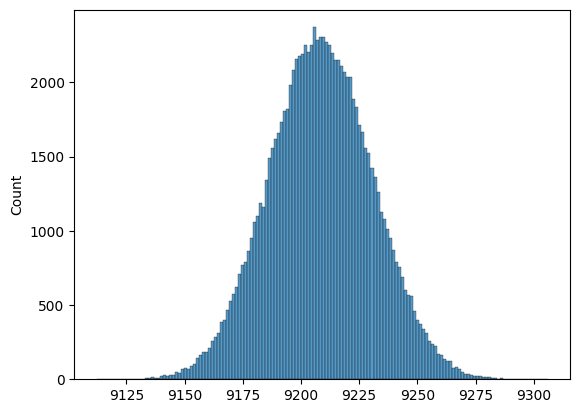

Population mean for the customers in 46_50 age group using bootstrap sampling is: 9208.5887522278
Sample mean for the customers in 46_50 age group in the given dataset is 9208.625697468327


In [92]:
sns.histplot(mean_dist_46_50)
plt.show()
print(f"Population mean for the customers in 46_50 age group using bootstrap sampling is: {np.mean(mean_dist_46_50)}")
print(f"Sample mean for the customers in 46_50 age group in the given dataset is {df_46_50['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 46-50 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 46_50 age group using bootstrap sampling is: 9208.589.
3. Sample mean for the customers in 46_50 age group in the given dataset is 9208.626.

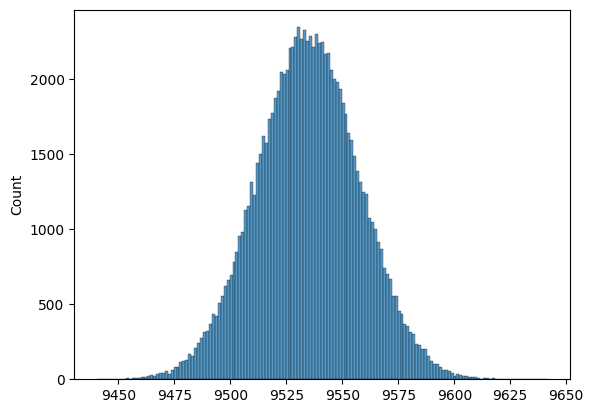

Population mean for the customers in 51_55 age group using bootstrap sampling is: 9534.855806732001
Sample mean for the customers in 51_55 age group in the given dataset is 9534.808030960236


In [93]:
sns.histplot(mean_dist_51_55)
plt.show()
print(f"Population mean for the customers in 51_55 age group using bootstrap sampling is: {np.mean(mean_dist_51_55)}")
print(f"Sample mean for the customers in 51_55 age group in the given dataset is {df_51_55['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 50-55 years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 51_55 age group using bootstrap sampling is: 9534.856.
3. Sample mean for the customers in 51_55 age group in the given dataset is 9534.808.

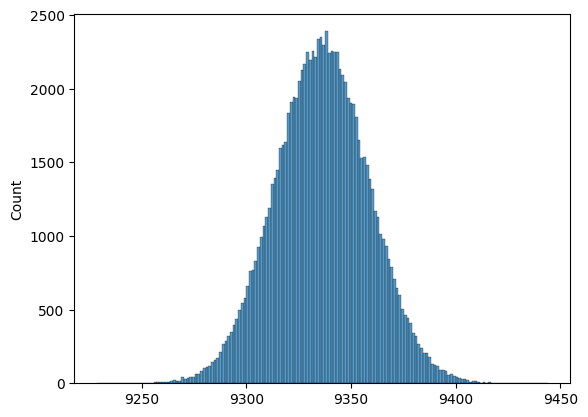

Population mean for the customers in 55+ age group using bootstrap sampling is: 9336.2302862136
Sample mean for the customers in 55+ age group in the given dataset is 9336.280459449405


In [94]:
sns.histplot(mean_dist_55p)
plt.show()
print(f"Population mean for the customers in 55+ age group using bootstrap sampling is: {np.mean(mean_dist_55p)}")
print(f"Sample mean for the customers in 55+ age group in the given dataset is {df_55p['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for customers in age group 50+ years for 100k samples, gives a normal distribution.
2. Population mean for the customers in 55+ age group using bootstrap sampling is: 9336.230.
3. Sample mean for the customers in 55+ age group in the given dataset is 9336.280.

Observations:
1. Based on CTL based sample mean distributions, the following are the mean purchases of different age groups in the increasing order of the mean purchase amounts.

Age Group | Mean of distribution of sample means through bootstrap | Mean from given dataset

0-17 years | 8933.439 | 8933.465

18-25 years | 9169.553 | 9169.664

46-50 years | 9208.589 | 9208.626

26-35 years | 9252.746 | 9252.690

36-45 years | 9331.396 | 9331.350

50+ years | 9336.230 | 9336.280

51-55 years | 9534.856 | 9534.808





##### Obtaining the interval in which the population average Purchase amounts for the age groups would lie

In [23]:
get_confidence_interval(data = df, col = "Age", ci = 0.99, sample_size = 250000)

Bootstrap sample of 250000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 99 % confidence will be in the interval:
 (8913.363268503557, 8965.969979496442)

Bootstrap sample of 250000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 99 % confidence will be in the interval:
 (9300.399665243975, 9352.068518756027)

Bootstrap sample of 250000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 99 % confidence will be in the interval:
 (9234.51760683664, 9286.22312916336)

Bootstrap sample of 250000 datapoints for customers with Age = 46-50 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 46-50 with 99 % confidence will be in the interval:
 (9183.74

In [24]:
get_confidence_interval(data = df, col = "Age", ci = 0.95, sample_size = 250000)

Bootstrap sample of 250000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 95 % confidence will be in the interval:
 (8927.745221313511, 8967.836986686489)

Bootstrap sample of 250000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 95 % confidence will be in the interval:
 (9320.860528621384, 9360.155623378616)

Bootstrap sample of 250000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 95 % confidence will be in the interval:
 (9235.504229224489, 9274.73766677551)

Bootstrap sample of 250000 datapoints for customers with Age = 46-50 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 46-50 with 95 % confidence will be in the interval:
 (9198.7

In [25]:
get_confidence_interval(data = df, col = "Age", ci = 0.90, sample_size = 250000)

Bootstrap sample of 250000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 90 % confidence will be in the interval:
 (8922.906081441943, 8956.574094558058)

Bootstrap sample of 250000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 90 % confidence will be in the interval:
 (9314.327436135962, 9347.282163864038)

Bootstrap sample of 250000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 90 % confidence will be in the interval:
 (9222.363113386715, 9255.337438613284)

Bootstrap sample of 250000 datapoints for customers with Age = 46-50 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 46-50 with 90 % confidence will be in the interval:
 (9200.

Observations:
1. With 99% confidence, with a bootstrapped sample of 250k datapoints, we can say that the average purchase amount of customers in age group 51-55 is the highest followed by that of age groups 36-45 and 55+ with an overlap, followed by 26-35 and 46-50 slightly overlapping with each other, followed by 18-25 and the least average purchase amount interval is of 0-17 with 99% cofidence interval.
2. With 95% confidence, with a bootstrapped sample of 250k datapoints, we can say that the average purchase amount of customers in age group 51-55 is the highest followed by that of age groups 36-45 and 55+ with an overlap, followed by 26-35 and 46-50 slightly overlapping with each other, followed by 18-25 and the least average purchase amount interval is of 0-17 with 99% cofidence interval.
3. With 90% confidence, with a bootstrapped sample of 250k datapoints, we can say that the average purchase amount of customers in age group 51-55 is the highest followed by that of age groups 36-45 and 55+ with an overlap, followed by 26-35 and 46-50 overlapping with each other, followed by 18-25 and the least average purchase amount interval is of 0-17 with 99% cofidence interval.
4. We can see that there is an overlap between the age groups 36-45 and 55+ and age groups 26-35 and 46-50.

In [4]:
get_confidence_interval_from_sample_means(data = df, col = "Age", ci = 0.9, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 90 % confidence will be in the interval:
 (8933.156277553517, 8933.687416406483)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 90 % confidence will be in the interval:
 (9133.601549182917, 9135.760403909084)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 90 % confidence will be in the interval:
 (9173.165648309217, 9175.045834518116)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for 

In [5]:
get_confidence_interval_from_sample_means(data = df, col = "Age", ci = 0.5, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 50 % confidence will be in the interval:
 (8933.506927415552, 8933.725131554447)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 50 % confidence will be in the interval:
 (9134.421819862222, 9135.30711665978)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 50 % confidence will be in the interval:
 (9173.684037250918, 9174.454538427086)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for c

In [6]:
get_confidence_interval_from_sample_means(data = df, col = "Age", ci = 0.95, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 95 % confidence will be in the interval:
 (8933.057897887225, 8933.690949338772)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 95 % confidence will be in the interval:
 (9133.503888978366, 9136.07813462063)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 95 % confidence will be in the interval:
 (9173.02848288938, 9175.269577869285)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for cu

In [7]:
get_confidence_interval_from_sample_means(data = df, col = "Age", ci = 0.99, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 0-17 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 0-17 with 99 % confidence will be in the interval:
 (8932.988266831608, 8933.819344496389)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 55+ from the given sample dataset.
Average Purchase amount of the population for customers with Age = 55+ with 99 % confidence will be in the interval:
 (9133.174950461727, 9136.55877426527)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Age = 26-35 from the given sample dataset.
Average Purchase amount of the population for customers with Age = 26-35 with 99 % confidence will be in the interval:
 (9172.628366924175, 9175.573486205158)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for c

Observations:
1. With 50% confidence, for a distribution of 100k bootstrapped sample means of sample sizes 10k, we can say that the average purchase amount of customers in age group 36-45 is the highest followed by that of age groups 18-25 and 51-55 with an overlap, followed by 46-50, 26-35, 55+ and the least average purchase amount interval is of 0-17.
2. With 90% confidence, for a distribution of 100k bootstrapped sample means of sample sizes 10k, we can say that the average purchase amount of customers in age group 36-45 is the highest followed by that of age groups 18-25 and 51-55 with an overlap, followed by 46-50, 26-35, 55+ and the least average purchase amount interval is of 0-17.
3. With 95% confidence, for a distribution of 100k bootstrapped sample means of sample sizes 10k, we can say that the average purchase amount of customers in age group 36-45 is the highest followed by that of age groups 18-25 and 51-55 with an overlap, followed by 46-50, 26-35, 55+ and the least average purchase amount interval is of 0-17.
3. With 99% confidence, for a distribution of 100k bootstrapped sample means of sample sizes 10k, we can say that the average purchase amount of customers in age group 36-45 is the highest followed by that of age groups 18-25 and 51-55 with an overlap, followed by 46-50, 26-35, 55+ and the least average purchase amount interval is of 0-17.
4. We can see that there is an overlap between only the age groups 18-25 and 51-55. The overlap is consistent even with 50% confidence.

###### Q5. Results when the same activity is performed for Married vs Unmarried (10 Points)

##### Analyzing Marital_Status variable

In [3]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [4]:
n = len(df)

single_mean_distribution = []
married_mean_distribution = []

s_df = df[df['Marital_Status'] == 0]
m_df = df[df['Marital_Status'] == 1]

n = 100000

for i in range(n):
    s_bootstrap_sample = s_df.sample(n=50000, replace=True)
    m_bootstrap_sample = m_df.sample(n=50000, replace=True)
    sample_single_mean = s_bootstrap_sample['Purchase'].mean()
    sample_married_mean = m_bootstrap_sample['Purchase'].mean()
    single_mean_distribution.append(sample_single_mean)
    married_mean_distribution.append(sample_married_mean)

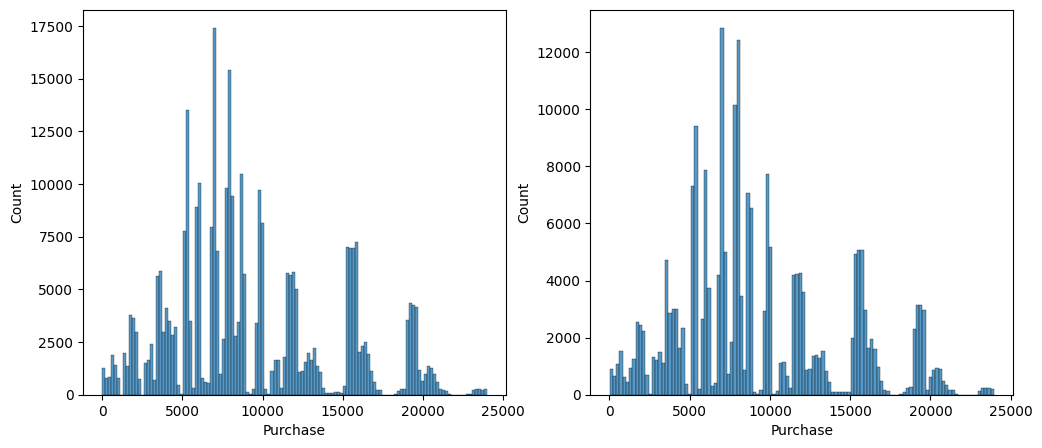

In [5]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(s_df['Purchase'])

plt.subplot(1,2,2)
sns.histplot(m_df['Purchase'])
plt.show()

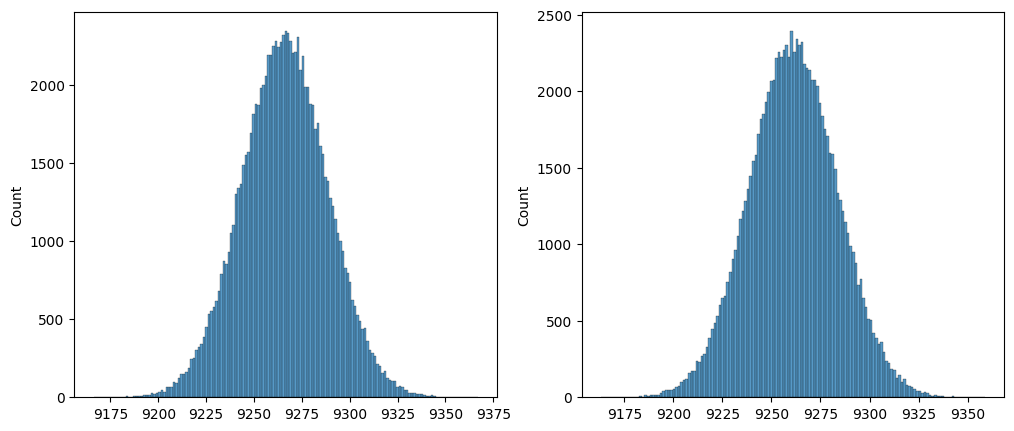

In [6]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(single_mean_distribution)

plt.subplot(1,2,2)
sns.histplot(married_mean_distribution)
plt.show()

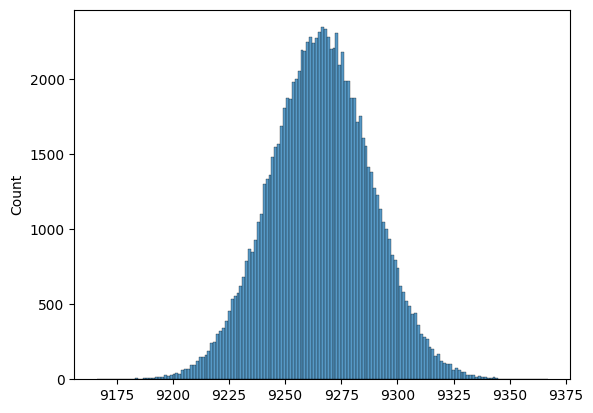

Population mean for the Single customers using bootstrap sampling is: 9265.974593387002
Sample mean for the Single customers in the given dataset is 9265.907618921507


In [7]:
sns.histplot(single_mean_distribution)
plt.show()
print(f"Population mean for the Single customers using bootstrap sampling is: {np.mean(single_mean_distribution)}")
print(f"Sample mean for the Single customers in the given dataset is {s_df['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for Single customers for 100k samples, gives a normal distribution. The mean of the sample mean is coming out to be 9265.78.

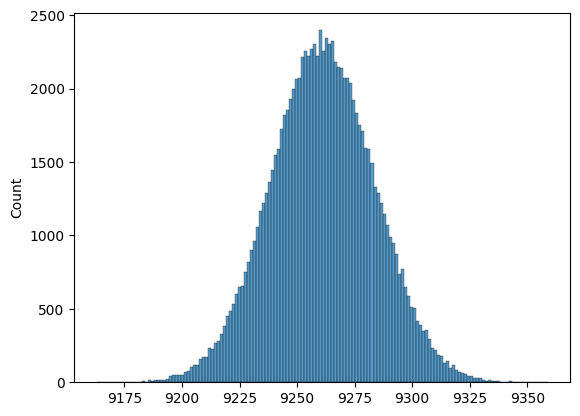

Population mean for the Married customers using bootstrap sampling is: 9261.126218377201
Sample mean for the Married customers in the given dataset is 9261.174574082374


In [8]:
sns.histplot(married_mean_distribution)
plt.show()
print(f"Population mean for the Married customers using bootstrap sampling is: {np.mean(married_mean_distribution)}")
print(f"Sample mean for the Married customers in the given dataset is {m_df['Purchase'].mean()}")

Observations:
1. Bootstrapping and creating a distribution of sample means of purchase amounts samples for Married customers for 100k samples, gives a normal distribution. The mean of the sample mean is coming out to be 9261.18.

Observations:
1. The above CTL based mean purchases indicate that the mean purchase amounts of Single customers is slightly greater than the mean purchase amounts of Married customers.

In [46]:
get_confidence_interval(data = df, col = "Marital_Status", ci = 0.99, sample_size = 'full')

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 99 % confidence will be in the interval:
 (9253.86858942255, 9288.803891070773)

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 99 % confidence will be in the interval:
 (9247.732153979963, 9282.587366515683)



In [47]:
get_confidence_interval(data = df, col = "Marital_Status", ci = 0.95, sample_size = 'full')

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 95 % confidence will be in the interval:
 (9247.97307183153, 9274.548638211592)

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 95 % confidence will be in the interval:
 (9259.714899587752, 9286.258136473245)



In [48]:
get_confidence_interval(data = df, col = "Marital_Status", ci = 0.8, sample_size = 'full')

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 80 % confidence will be in the interval:
 (9254.730370813522, 9272.109114486477)

Bootstrap sample of 550068 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 80 % confidence will be in the interval:
 (9244.453009470344, 9261.806114856103)



Observations:

1. Incase of bootstraped sample size of 550068 datapoints:

        1.With 99 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9253.869, 9288.803]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9247.732, 9282.587]

        2.With 95 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9247.973, 9274.549]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9259.715, 9286.258]

        3.With 80 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9254.730, 9272.109]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9244.453, 9261.806]

Observations:
1. There is an overlap between the intervals of average purchase amount of single customers and average purchase amount of married customers in the given dataset.
2. Hence we cannot say that there is a significant different between the average purchase amount of single customers and average purchase amount of married customers in the given dataset.

###### Getting confidence interval of average purchase amount between the Single and Married customers using the distribution of sample means

In [7]:
get_confidence_interval_from_sample_means(data = df, col = "Marital_Status", ci = 0.99, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 99 % confidence will be in the interval:
 (9265.426263132402, 9266.247919345598)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 99 % confidence will be in the interval:
 (9263.039679739455, 9263.859548520546)



In [6]:
get_confidence_interval_from_sample_means(data = df, col = "Marital_Status", ci = 0.95, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 95 % confidence will be in the interval:
 (9265.655913971827, 9266.278283690172)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 95 % confidence will be in the interval:
 (9263.205083215023, 9263.827996517975)



In [5]:
get_confidence_interval_from_sample_means(data = df, col = "Marital_Status", ci = 0.9, iterations = 100000, sample_size = 10000)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 0 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 0 with 90 % confidence will be in the interval:
 (9265.877648302012, 9266.40039388799)

Sample mean distribution size of 100000 means.
Bootstrap sample of 10000 datapoints for customers with Marital_Status = 1 from the given sample dataset.
Average Purchase amount of the population for customers with Marital_Status = 1 with 90 % confidence will be in the interval:
 (9263.2960205559, 9263.819705420101)



Observations:
1. Incase of the distribution of 100k sample means with sample size of 10k datapoints:

        1.With 90 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9265.878, 9266.4]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9263.296, 9263.82]

        2.With 95 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9265.656, 9266.278]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9263.205, 9263.828]

        3.With 99 % confidence:

            a. Marital_Status = 0 , Mean purchase amount will be in the interval [9265.426, 9266.248]

            b. Marital_Status = 1 , Mean purchase amount will be in the interval [9263.04, 9263.86]

Observations:
1. The distribution of 100k sample means of sample sizes 10k suggests that, there is NO overlap between the average purchase amount intervals between Single and married customers.
2. The interval of average purchase amounts of Single customers is slightly greater than the interval of average purchase amounts of Married customers with a 99% confidence.

### Insights:

1. The dataset contains 550068 records and 10 features, which is a sample from the population of 100 million people assuming 50M Male and 50M Female customers.
2. The User_ID, Occupation, Marital_Status, Product_Category and Purchase are numerical variables.
3. The Product_ID, Gender, Age, City)Category and Stay_In_Current_City_Years are non-numerical variables.
4. The Occupation variable is slightly right skewed with a range of values between 0 to 20.
5. Atleast 50% of the customers in the sample are Single(if Marital_Status = 0 represents single).
6. Product categories values range from 1 to 20. Atleast 50% of the data points have the product categories as 5 or less.
7. The purchase amounts are in the range from 12 to 23961. At least 50% of the datapoints have Purchase amounts less that 8047. The distribution is right skewed.
8. There are no missing values and no duplicate records in the dataset.

##### User_ID 

1. There are 5891 unique customers in the dataset out of 550068 records indicating that the customers have performed multiple transactions.
2. The top 5 Users that have performed the most number of transactions are 1001680, 1004277, 1001941, 1001181 and 1000889.

##### Product_ID

1. There are 3631 unique products in the dataset.
2. The top 5 most purchased products are P00265242, P00025442, P00110742, P00112142 and P00057642.

##### Gender

1. The dataset contains 75.31% of Male customers and 24.69% Female customers.
2. The number of Male customers is greater than the number of Female customers. There are outliers in the purchase amounts of both Male and Female samples.
3. The median purchase amounts between male and female customers are not too different in the given sample but the average purchase amounts of the Male customers are slightly greater than the average purchase amounts of Female customers.

##### Age

1. The Age feature is showing customers in age buckets with 7 age buckets ranging from 0 to 55+ years.
2. Most of the customers are in the age range 26-35 years (39.92%) followed by customers in their 36-45 years(20%) and customers in their 18-25 years(18.12%). The least number of customers are in the age group 0-17(2.75%) and customers in the age group 55+(3.91%).
3. There are outliers in the purchase amuonts in all the age groups.
4. The median purchase amounts between all the age groups seem to be almost similar but the average purchase amounts between the age groups seems slightly different from one another yet pretty close.
5. The Female customers have more purchase amount outliers in almost all the age groups than the Male customers.
6. The variance in the purchase amounts of Male customers in all the age groups are greater than the variance in the purchase amounts of Female customers.
7. Every age group suggests that the Female Purchase amount is lesser than the Male purchase amount.

##### Occupation

1. There are 21 unique attributes in Occupation features. They are: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 and 20.
2. There are no outliers in the Occupation variable but there are outliers in all the occupation groups with respect to Purchase amounts.
3. The top 5 occupations are 4, 0, 7, 1 and 17.
4. TSome of the median Purchase amounts like for occupations 8,12,15 and 17 are slightly greater than the other groups. The average Purchases amounts of these occupation groups(8,12,15 amd 17) also seem to be slightly greater than the other groups.

##### City_Category

1. The City_Category is a categorical variable with three categories A, B and C.
2. The highest number of customers are from the city category B(42.03%) followed by C(31.12%) and A(26.85%).
3. The median Purchase amount and the average purchase amount of the City_Category 'C' is slightly greater than the median Purchase amount of City_Category 'A' and 'B'.

##### Stay_In_Current_City_Years

1. There are 5 categories in the Stay_In_Current_City_Years variable. The categories are 0, 1, 2, 3 and 4+.
2. About 35.24 % of the customers have stated that they are staying in the current city for atleast 1 year. About 18.51%, 17.32%, 15.4% and 13.53% of the customers in the dataset have said that they are staying in the current city for 2, 3, 4+ and 0 years respectively.
3. There are some outliers in all the Stay_In_Current_City_Years variable.
4. The median and the average Purchase amounts of all the groups seem to be pretty close to each other.

##### Marital_Status

1. The Marital_Status has two categories 0 and 1 where 0 represents Single customers and 1 represents Married customers.
2. There are 59.03% of customers with Marital_Status = 0 and 40.97% of the customers with Marital_Status = 1.
3. There are outliers in both Marital_Status categories.
4. The Female customers have more outliers than Male customers in terms of Purchase amounts.
5. The average and the Median purchase amounts of the Male customers are slightly greater than the average and medium purchase amounts of the Female customers.

##### Product_Category

1. There are 20 unique attributes in Product_Category features. They are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 and 20.
2. The top 5 most number of records in the dataset are for Product Categories 5, 1, 8, 11 and 2.
3. There are some outliers(0.75%) in the overall Product_Category variable that are present in few of the product categories like 1, 2, 4, 5, 9, 10, 14 and 16.
4. The product category 10 has the highest median purchase amount of all the product categories followed by 7, 15, 6 and 16.
5. The least median purchase amounts are for 19, 20, 13 and 12.
6. The product category 10 has the highest average purchase amount of all the product categories followed by 7, 6, 9, 15 and 16.
7. The least average purchase amounts are for 19, 20, 13 and 12.

##### Purchase

1. The Purchase variable is a continuos variable that shows transaction wise amount spent by the customers.
2. The sample provided does not follow a Gaussian distribution.
3. There are few outliers(0.49%) in the Purchase variable.

##### Correlation

1. There is some correlation between Product_Category and Purchase but its not significant. It shows that for some product categories the purchase amount is more and for some the purchase amount is less.

#### Populations inferences

##### Gender:

1. As per the given dataset, after generating a distribution of sample means of bootstraped samples, average purchase amount for women customers is 8734.603 and the average purchase amount of Men customer is 9437.659, we can say that women are not spending more money per transaction than men.

We can also look for the confidence intervals below.

###### With bootstrapped sample:

1. Incase of sample mean distribution of 50 datapoints with sample size of 50 datapoints: With 90 % confidence:

     a. Gender = F , Mean purchase amount will be in the interval [8537.735, 8876.886]

     b. Gender = M , Mean purchase amount will be in the interval [8875.844, 9232.518]
     
2. We can observe that by reducing the confidence from 99% to 95% to 90%, the overlap between the two confidence intervals are decreasing. With 95% confidence, with only 50 datapoints in the bootstrapped sample, the average purchase interval for Male customers is [8872.716, 9297.242] and for female customers is [8469.149, 8838.723].
80. Here, we can observe that the male customers' average purchase amounts is greater than the female customers' average purchase amounts.

###### With a distribution of sample means of bootstrapped samples:

1. Using a distribution of sample means with 100k datapoints which are the means of bootstraped samples of 50k datapoints, we are able to get average Purchase amount intervals that are not overlapping.
83. The Mean purchase amount for the Female customers is in the interval [8734.376, 8734.722] and the Mean purchase amount for the Male customers will be in the interval [9083.128, 9088.864] with 99% confidence.
84. We can say with 99 % confidence that the average purchase amount for the Male customers is greater than the average purchase amount of the Female customers.

##### Age:
1. The average purchase amounts of customers based in their age groups from the given dataset are:

         0-17 is 8933.465
 
         55+ is 9336.28
 
         26-35 is 9252.691
 
         46-50 is 9208.626
 
         51-55 is 9534.808
 
         36-45 is 9331.351
 
         18-25 is 9169.664
 
###### With bootstrapped samples:

1. With 90%, 95% and 99% confidence and with a bootstrapped sample of 250k datapoints, we can say that the average purchase amount of customers in age group 51-55 is the highest followed by that of age groups 36-45 and 55+ with an overlap, followed by 26-35 and 46-50 slightly overlapping with each other, followed by 18-25 and the least average purchase amount interval is of 0-17 with 99% cofidence interval.
2. We can see that there is an overlap between the age groups 36-45 and 55+ and age groups 26-35 and 46-50.

###### With a distribution of sample means of bootstrap samples:

1. With 50%, 90%, 95% and 99% confidence, for a distribution of 100k bootstrapped sample means of sample sizes 10k, we can say that the average purchase amount of customers in age group 36-45 is the highest followed by that of age groups 18-25 and 51-55 with an overlap, followed by 46-50, 26-35, 55+ and the least average purchase amount interval is of 0-17.
2. We can see that there is an overlap between only the age groups 18-25 and 51-55. The overlap is consistent even with 50% confidence.

##### Marital_Status

###### With bootstraped samples:

1. With 80 % confidence:

     a. Marital_Status = 0 , Mean purchase amount will be in the interval [9254.730, 9272.109]

     b. Marital_Status = 1 , Mean purchase amount will be in the interval [9244.453, 9261.806]
     
2. There is an overlap between the intervals of average purchase amount of single customers and average purchase amount of married customers in the given dataset even at 80% confidence. Hence we cannot say that there is a significant different between the average purchase amount of single customers and average purchase amount of married customers in the given dataset.

###### With a distribution of sample means of bootstrapped samples:

1. Incase of the distribution of 100k sample means with sample size of 10k datapoints: With 99 % confidence:

     a. Marital_Status = 0 , Mean purchase amount will be in the interval [9265.426, 9266.248]

     b. Marital_Status = 1 , Mean purchase amount will be in the interval [9263.04, 9263.86]
2. The distribution of 100k sample means of sample sizes 10k suggests that, there is NO overlap between the average purchase amount intervals between Single and married customers. The interval of average purchase amounts of Single customers is slightly greater than the interval of average purchase amounts of Married customers with a 99% confidence.
3. Although we see the different results for applying confidence interval on only one sample and applying CI on a distribution of sample mean, I would rely on the outcome from the distribution of sample means since that uses many samples and the distribution is closer to the population distribution as per Central Limit Theorem.
4. Hence we can conclude that the average purchase amounts of Single customer is slightly higher than the average purchase amounts of Married customers. Although its not significantly higher.

### Recommendations:

1. Male customers are spending more than the female customers. Walmart can leverage this opportunity by targeting the male customers by offering more electronic products, sports related products, automotive parts, tools and apparels etc.
2. Since the male customers don't mind spending lot per transactions, Walmart could add more branded and quality products with high quality service in its inventory. This can be uses in Walmart's marketing strategy to attract more male customers.
3. Since female customers are spending lesser than male customers, Walmart can try to increase the sales in the female customers group by introducing some combo offers for female products and also offering some attractive discount sales.
4. Walmart can focus more on the age group 18-25, 36-45 and 51-55 since these age groups are willing to spend more money on purchasing as per the dataset. These groups might have more dispossable income and may be will to buy branded and quality products over budget products. The 18-25 years group may be willing to try out new things and would appreciate trying new trends. The 36-45 years group may be more focused on house or family-oriented related products and tools and automotive parts. The 51-55 years group may be interested in more healthy lifestyle and may be willing to spend in organic food products.
5. The age group 0-17 may be more interested in games and accessories or sports products. Introducing some attractive discount offers may help increasing the revenue amoung this group. Offering more in-budget/cheaper products for the age group 26-35 may increase the purchase potential of the group.
6. Walmart should not consider that there is a significant difference in the purchase amounts between Single and Married customers because the difference is very small. Walmart should not assume that there is a significant difference between the average purchase amounts of single and married customers, as the results are not conclusive. The difference between the intervals of the mean purchase amounts of the two groups is very small and may not be practically significant. Therefore, Walmart should not use marital status as a major factor in segmenting its customer base or designing its marketing strategies.
7. Walmart should instead focus on other factors that may have more influence on the purchase behavior of its customers, such as gender, age, income, lifestyle, and preferences. These factors may have more variation and impact on how much customers spend at Walmart. We could use data analytics and customer feedback to identify the patterns and trends among these factors and tailor  product offerings, pricing, and promotions accordingly.
8. However, walmart should consider the social and cultural implications of marital status, as it may affect the expectations and needs of its customers. For example, single customers may value convenience, variety, and personalization more than married customers, who may prioritize quality, value, and family-oriented products. Walmart could use these insights to enhance its customer service and loyalty programs, as well as to create a more inclusive and diverse shopping environment for its customers.
9. Customers that work in the occupations 8, 12, 15 and 17 are spending more than the customers in other occupations. Walmart can find out if its selling any productions that are related to these occupations and increase its inventory with these stocks.
10. It is observed that the customers from City C is willing to spend more that the customers from Cities A and B although there is more number of customers from city B. Walmart could increase the accessibility of the store outlet in city C and that inturn might increase the customer count in city C. Walmart can increase the sales in the Cities A and B by offering some discount sales in those cities.